# Flourishing Case - Data Preparation, EDA and Feature Engineering

All the contents are formatted properly. Use Tabe of Content for better visibility

## Google Drive Mount

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Libraries

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score,classification_report
from sklearn.preprocessing import LabelEncoder

# Ignore warnings from seaborn
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint
from scipy.stats import chi2_contingency
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

## Accessing the file

In [3]:
os.getcwd()

'g:\\Other computers\\Mac book emlyon\\emlyon\\Introduction to ML\\Assignment\\notebook'

In [4]:
DATA_PATH = '../data'

In [5]:
os.chdir(DATA_PATH)

In [6]:
os.listdir('..')

['notebook', 'data', 'Report']

In [7]:
df = pd.read_excel("Flourishing_248_HD.xlsx")

## Data Info

In [ ]:
df.head()

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,6,2,2,3,82,3,83,4.142857,44
1,317,45,6,2,2,3,81,3,83,4.000000,44
2,444,43,5,1,1,3,79,3,78,5.000000,47
3,270,60,2,2,3,3,79,3,82,4.666667,42
4,52,49,2,2,2,3,77,3,73,2.285714,33


In [ ]:
df.describe()

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,245.201613,41.685484,4.616935,1.608871,2.536290,2.052419,50.612903,2.225806,55.987903,1.812982,32.951613
std,155.254472,10.154568,1.538453,0.488990,0.757348,0.597967,13.431614,0.537481,11.613367,0.803469,6.599417
min,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000,23.000000,0.384615,13.000000
25%,107.500000,34.000000,3.000000,1.000000,2.000000,2.000000,41.000000,2.000000,48.000000,1.272727,29.000000
50%,229.000000,40.000000,5.000000,2.000000,3.000000,2.000000,50.000000,2.000000,56.000000,1.720000,33.000000
75%,387.500000,49.000000,6.000000,2.000000,3.000000,2.000000,61.000000,3.000000,64.000000,2.170455,37.000000
max,513.000000,72.000000,6.000000,2.000000,3.000000,3.000000,82.000000,3.000000,83.000000,5.000000,48.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          248 non-null    int64  
 1   age         248 non-null    int64  
 2   education   248 non-null    int64  
 3   sex         248 non-null    int64  
 4   famstatus   248 non-null    int64  
 5   pro_cat     248 non-null    int64  
 6   pro_quant   248 non-null    int64  
 7   priv_cat    248 non-null    int64  
 8   priv_quant  248 non-null    int64  
 9   positivity  248 non-null    float64
 10  flow        248 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


In [ ]:
df.isnull().sum()

,0
ID,0
age,0
education,0
sex,0
famstatus,0
pro_cat,0
pro_quant,0
priv_cat,0
priv_quant,0
positivity,0


## Choosing the Target Variable
From an organizational perspective (business outcome), positivity is the target (dependent variable), as it helps the organization assess employees' mental health. With this model, the organization can identify the mental state of its employees and provide appropriate training, leading to improved productivity and better business outcomes.

In [ ]:
target=df['positivity']

In [ ]:
target.head()

,positivity
0,4.142857
1,4.000000
2,5.000000
3,4.666667
4,2.285714


## Dropping unwanted column

In [ ]:
df=df.drop("ID",axis=1)

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'famstatus', 'pro_cat', 'pro_quant', 'priv_cat', 'priv_quant', 'positivity', 'flow'], dtype='object')

## Creating Positivity Category Column

In [ ]:
df.loc[df["positivity"] < 1, "positivity_label"] = "depressed"
df.loc[(df["positivity"] >= 1) & (df["positivity"] < 2), "positivity_label"] = ("languishing")
df.loc[(df["positivity"] >= 2) & (df["positivity"] < 3), "positivity_label"] = ("moderately emotionally healthy")
df.loc[df["positivity"] >= 3, "positivity_label"] = "emotionally flourishing"

In [ ]:
df.head()

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,positivity_label
0,72,6,2,2,3,82,3,83,4.142857,44,emotionally flourishing
1,45,6,2,2,3,81,3,83,4.000000,44,emotionally flourishing
2,43,5,1,1,3,79,3,78,5.000000,47,emotionally flourishing
3,60,2,2,3,3,79,3,82,4.666667,42,emotionally flourishing
4,49,2,2,2,3,77,3,73,2.285714,33,moderately emotionally healthy


## Recoding Categories ( Maping )

In [ ]:
category_mappings = {
    "sex": {1: "Male", 2: "Female"},
    "famstatus": {1: "Single", 2: "Separated/Divorced", 3: "Couple"},
    "education": {
        1: "Has not completed high school degree",
        2: "Completed high school degree",
        3: "Up to 2 years after high school",
        4: "Up to 3 years after high school",
        5: "Up to 4 years after high school",
        6: "5 years or more after high school",
    },
    "pro_cat": {1: "Languishing", 2: "Moderately Mentally Healthy", 3: "Flourishing"},
    "priv_cat": {1: "Languishing", 2: "Moderately Mentally Healthy", 3: "Flourishing"},
}
for column, mapping in category_mappings.items():
    df[column] = df[column].map(mapping)

## Segregating Category and Quantitative Variable

In [ ]:
numerical_column = ['age', 'pro_quant', 'priv_quant', 'flow','positivity']

In [ ]:
numerical_column

['age', 'pro_quant', 'priv_quant', 'flow', 'positivity']

In [ ]:
categorical_column = ['education', 'sex', 'famstatus', 'pro_cat', 'priv_cat','positivity_label']

In [ ]:
categorical_column

['education', 'sex', 'famstatus', 'pro_cat', 'priv_cat', 'positivity_label']

In [ ]:
for name in categorical_column:
    df[name] = df[name].astype("category")

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'famstatus', 'pro_cat', 'pro_quant', 'priv_cat', 'priv_quant', 'positivity', 'flow', 'positivity_label'], dtype='object')

In [ ]:
df.head()

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,positivity_label
0,72,5 years or more after high school,Female,Separated/Divorced,Flourishing,82,Flourishing,83,4.142857,44,emotionally flourishing
1,45,5 years or more after high school,Female,Separated/Divorced,Flourishing,81,Flourishing,83,4.000000,44,emotionally flourishing
2,43,Up to 4 years after high school,Male,Single,Flourishing,79,Flourishing,78,5.000000,47,emotionally flourishing
3,60,Completed high school degree,Female,Couple,Flourishing,79,Flourishing,82,4.666667,42,emotionally flourishing
4,49,Completed high school degree,Female,Separated/Divorced,Flourishing,77,Flourishing,73,2.285714,33,moderately emotionally healthy


In [ ]:
categorical_predictors_df = df.select_dtypes(include=["category"])
numerical_predictors_df = df.select_dtypes(exclude=["category"])
numerical_predictors_df = numerical_predictors_df.drop(columns=["positivity"])
categorical_predictors_df = categorical_predictors_df.drop(columns=["positivity_label"])

In [ ]:
categorical_predictors_df.head()

,education,sex,famstatus,pro_cat,priv_cat
0,5 years or more after high school,Female,Separated/Divorced,Flourishing,Flourishing
1,5 years or more after high school,Female,Separated/Divorced,Flourishing,Flourishing
2,Up to 4 years after high school,Male,Single,Flourishing,Flourishing
3,Completed high school degree,Female,Couple,Flourishing,Flourishing
4,Completed high school degree,Female,Separated/Divorced,Flourishing,Flourishing


In [ ]:
numerical_predictors_df.head()

,age,pro_quant,priv_quant,flow
0,72,82,83,44
1,45,81,83,44
2,43,79,78,47
3,60,79,82,42
4,49,77,73,33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               248 non-null    int64   
 1   education         248 non-null    category
 2   sex               248 non-null    category
 3   famstatus         248 non-null    category
 4   pro_cat           248 non-null    category
 5   pro_quant         248 non-null    int64   
 6   priv_cat          248 non-null    category
 7   priv_quant        248 non-null    int64   
 8   positivity        248 non-null    float64 
 9   flow              248 non-null    int64   
 10  positivity_label  248 non-null    category
dtypes: category(6), float64(1), int64(4)
memory usage: 12.2 KB


## Univariate Analaysis

###Univariate categorical column

#### Summary Table

In [ ]:
def categorical_univariate_analysis(df):
    # Initialize an empty list to store the results
    summary_list = []

    # Iterate over each categorical column
    for i in categorical_column:
        # Compute the count and percentage of each category
        counts = df[i].value_counts()
        percentages = df[i].value_counts(normalize=True) * 100
        summary_df = pd.DataFrame({'Count': counts,'Percentage': percentages}).reset_index()
        summary_df.rename(columns={'index': i}, inplace=True)
        print(f"\033[1m Summary table for {i}\033[0m")
        print("-" * 80)
        print(summary_df)
        print("\n")

In [ ]:
categorical_univariate_analysis(df)

 Summary table for education
--------------------------------------------------------------------------------
                              education  Count  Percentage
0     5 years or more after high school    110   44.354839
1       Up to 2 years after high school     39   15.725806
2       Up to 4 years after high school     39   15.725806
3       Up to 3 years after high school     31   12.500000
4          Completed high school degree     20    8.064516
5  Has not completed high school degree      9    3.629032


 Summary table for sex
--------------------------------------------------------------------------------
      sex  Count  Percentage
0  Female    151   60.887097
1    Male     97   39.112903


 Summary table for famstatus
--------------------------------------------------------------------------------
            famstatus  Count  Percentage
0              Couple    173   69.758065
1              Single     40   16.129032
2  Separated/Divorced     35   14.112903


 Summa

In [ ]:
summary_table = df[categorical_column].describe()

In [ ]:
summary_table

,education,sex,famstatus,pro_cat,priv_cat,positivity_label
count,248,248,248,248,248,248
unique,6,2,3,3,3,4
top,5 years or more after high school,Female,Couple,Moderately Mentally Healthy,Moderately Mentally Healthy,languishing
freq,110,151,173,159,164,143


#### Bar graph

In [ ]:
def bar_graph(df):

    f, ax = plt.subplots(2, 3, figsize=(25, 13))
    ax = ax.flatten()

    for i, name in enumerate(categorical_column):
        counts = df[name].value_counts()
        labels = counts.index.astype(str)
        colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
        ax[i].bar(labels, counts, color=colors)
        ax[i].set_title(f"Distribution of {name}", fontdict={'fontsize': 10, 'fontweight': 'bold'}, pad=10)
        ax[i].set_xlabel(name, fontdict={'fontsize': 10, 'fontweight': 'bold', 'color': 'black'}, labelpad=20)
        ax[i].set_ylabel('Count')
        ax[i].set_xticklabels(labels, rotation=20, ha='right')  # Rotate x-axis labels

    plt.tight_layout()
    plt.show()

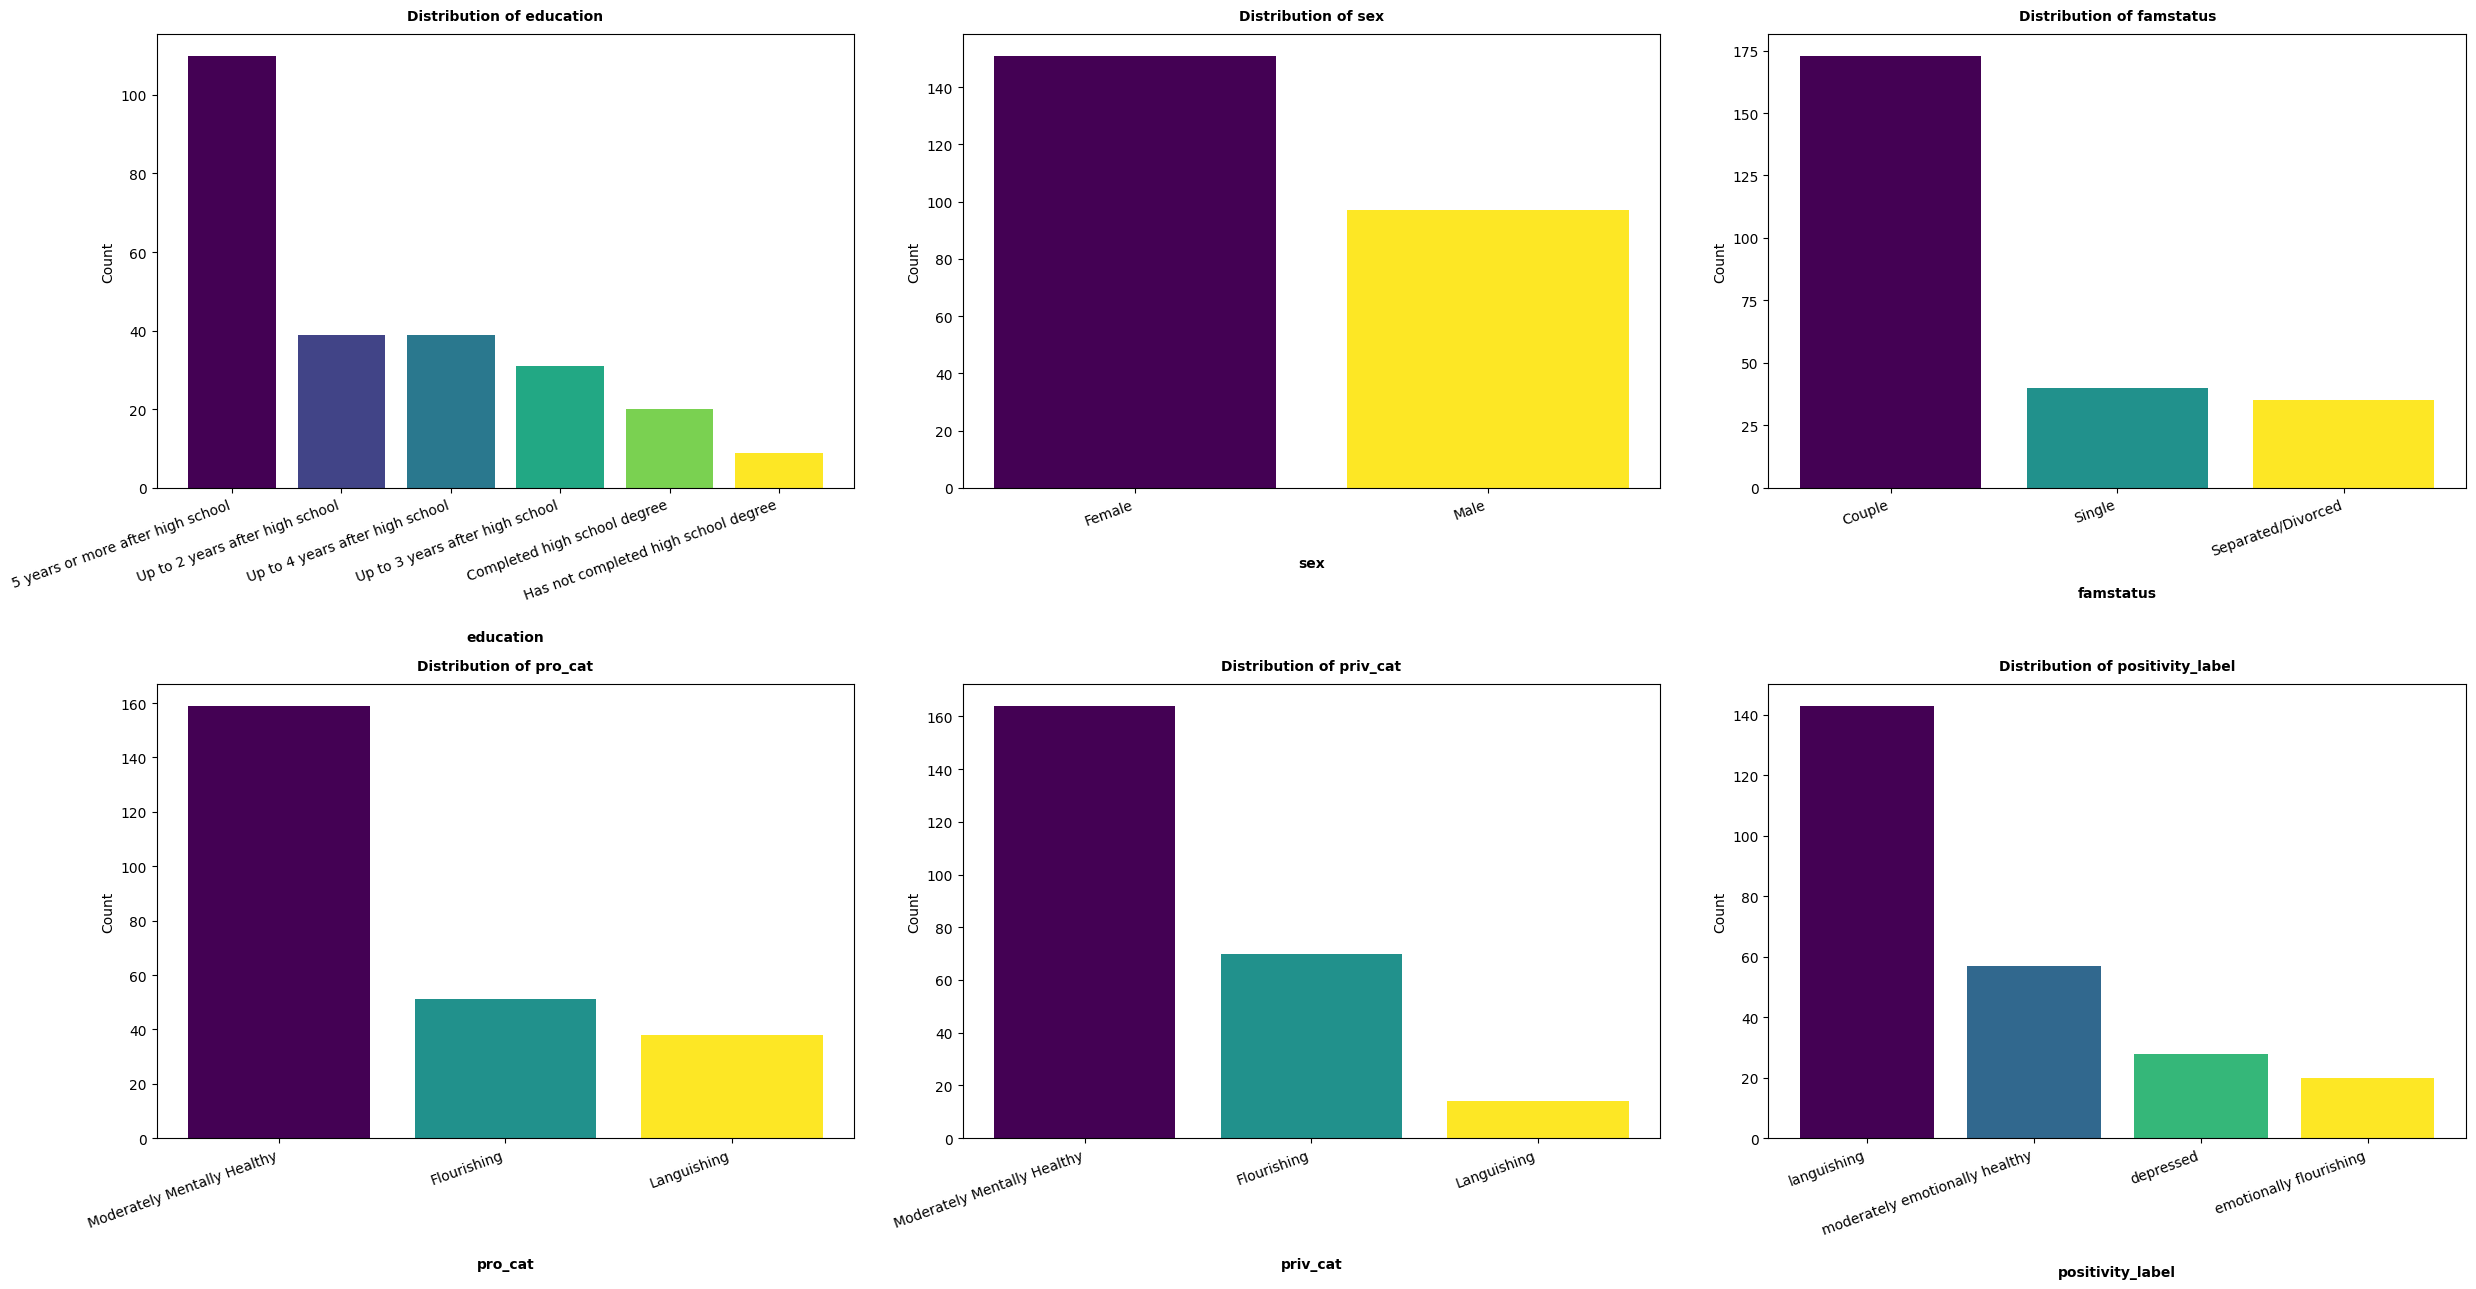

In [ ]:
bar_graph(df)

#### Pie Graph

In [ ]:
def pie(df):

    f, ax = plt.subplots(2, 3, figsize=(25, 13), gridspec_kw={'height_ratios': [3, 3], 'hspace': 0.3})
    ax = ax.flatten()  # Flatten the ax array for easier indexing:

    for i, name in enumerate(categorical_column):
        counts = df[name].value_counts()
        labels = counts.index.astype(str)
        ax[i].pie(counts, autopct="%1.1f%%", labels=labels, startangle=140)
        ax[i].set_title(f"Percentage distribution of {name}",fontdict={'fontsize': 14, 'fontweight': 'bold'},pad=50)
        ax[i].axis("equal")
    plt.tight_layout()
    plt.show()

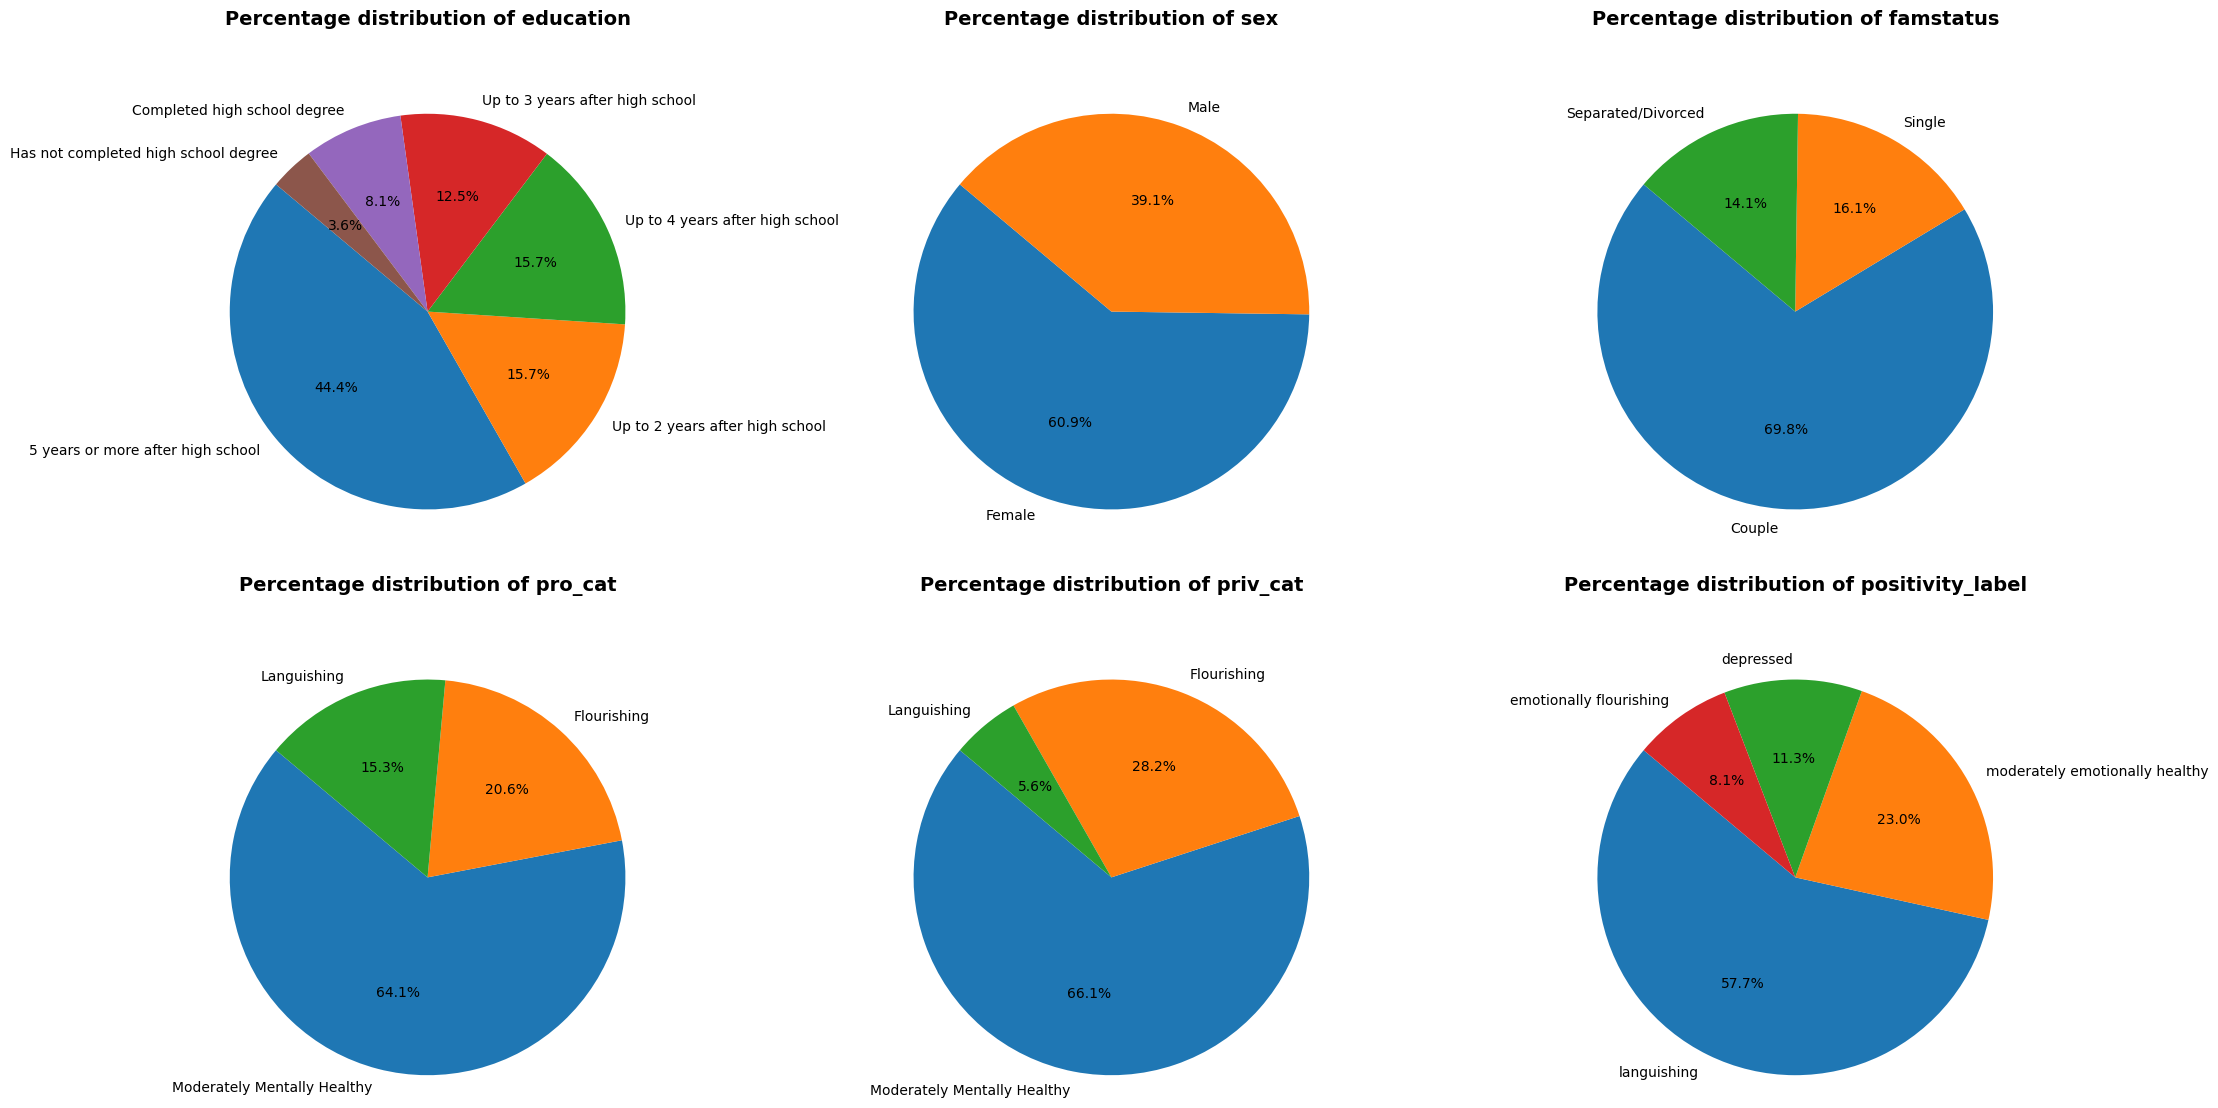

In [ ]:
pie(df)

### Univariate numerical column

#### Frequency Distribution Table

In [ ]:
def frequency_table_based_on_bins(df, bin):


    for i in numerical_column:

      counts, bin_edges = np.histogram(df[i], bins=bin, density=False)
      bin_width = np.diff(bin_edges)

    # Create a DataFrame for the frequency table
      frequency_table = pd.DataFrame({'bin_start': bin_edges[:-1].astype(int),'bin_end': bin_edges[1:].astype(int), 'bin_midpoint': (bin_edges[:-1] + bin_edges[1:]) / 2,'bin_width': bin_width,'Freq': counts,'Precentage':counts/sum(counts)%100,'Cum_Percentage' : np.cumsum(counts)/np.sum(counts)*100})
      print(f"\033[1mFrequency table for {i}\033[0m")
      print("-" * 80)
      print(frequency_table)
      print("\n")

In [ ]:
frequency_table_based_on_bins(df,10)

Frequency table for age
--------------------------------------------------------------------------------
   bin_start  bin_end  bin_midpoint  bin_width  Freq  Precentage  Cum_Percentage
0         20       25          22.6        5.2     7    0.028226        2.822581
1         25       30          27.8        5.2    22    0.088710       11.693548
2         30       35          33.0        5.2    50    0.201613       31.854839
3         35       40          38.2        5.2    52    0.209677       52.822581
4         40       46          43.4        5.2    33    0.133065       66.129032
5         46       51          48.6        5.2    37    0.149194       81.048387
6         51       56          53.8        5.2    20    0.080645       89.112903
7         56       61          59.0        5.2    18    0.072581       96.370968
8         61       66          64.2        5.2     7    0.028226       99.193548
9         66       72          69.4        5.2     2    0.008065      100.000000


Fr

#### Histogram and Pareto

In [ ]:
numerical_column

['age', 'pro_quant', 'priv_quant', 'flow', 'positivity']

In [ ]:
def hist(df,bin):
    fig, axes = plt.subplots(2, 3, figsize=(25, 13))
    axes = axes.flatten()

    # Plot histograms using seaborn
    for i, column in enumerate(numerical_column):
        ax = axes[i]
        sns.histplot(df[column], ax=ax, bins=bin, edgecolor="k", kde=True)

         # Calculate cumulative frequency
        counts, bin_edges = np.histogram(df[column], bins=bin, density=False)
        bin_width = np.diff(bin_edges)
        bins_mid = (bin_edges[:-1] + bin_edges[1:]) / 2
        cumulative_counts = np.cumsum(counts)
        total_count = np.sum(counts)
        cumulative_freq = cumulative_counts / total_count * 100
        ax2 = ax.twinx()
        ax2.plot(bins_mid, cumulative_freq, marker='o', color='orange', linewidth=2)
        ax2.set_ylabel('Cumulative Frequency (%)', color='orange')

        ax.set_title(f"Histogram and Pareto for {column}", fontsize=12, fontweight='bold', pad=20)
        ax.set_xlabel(column, fontsize=10)
        ax.set_ylabel("Frequency", fontsize=10)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)
    fig.delaxes(axes[len(numerical_column)])
    plt.show()



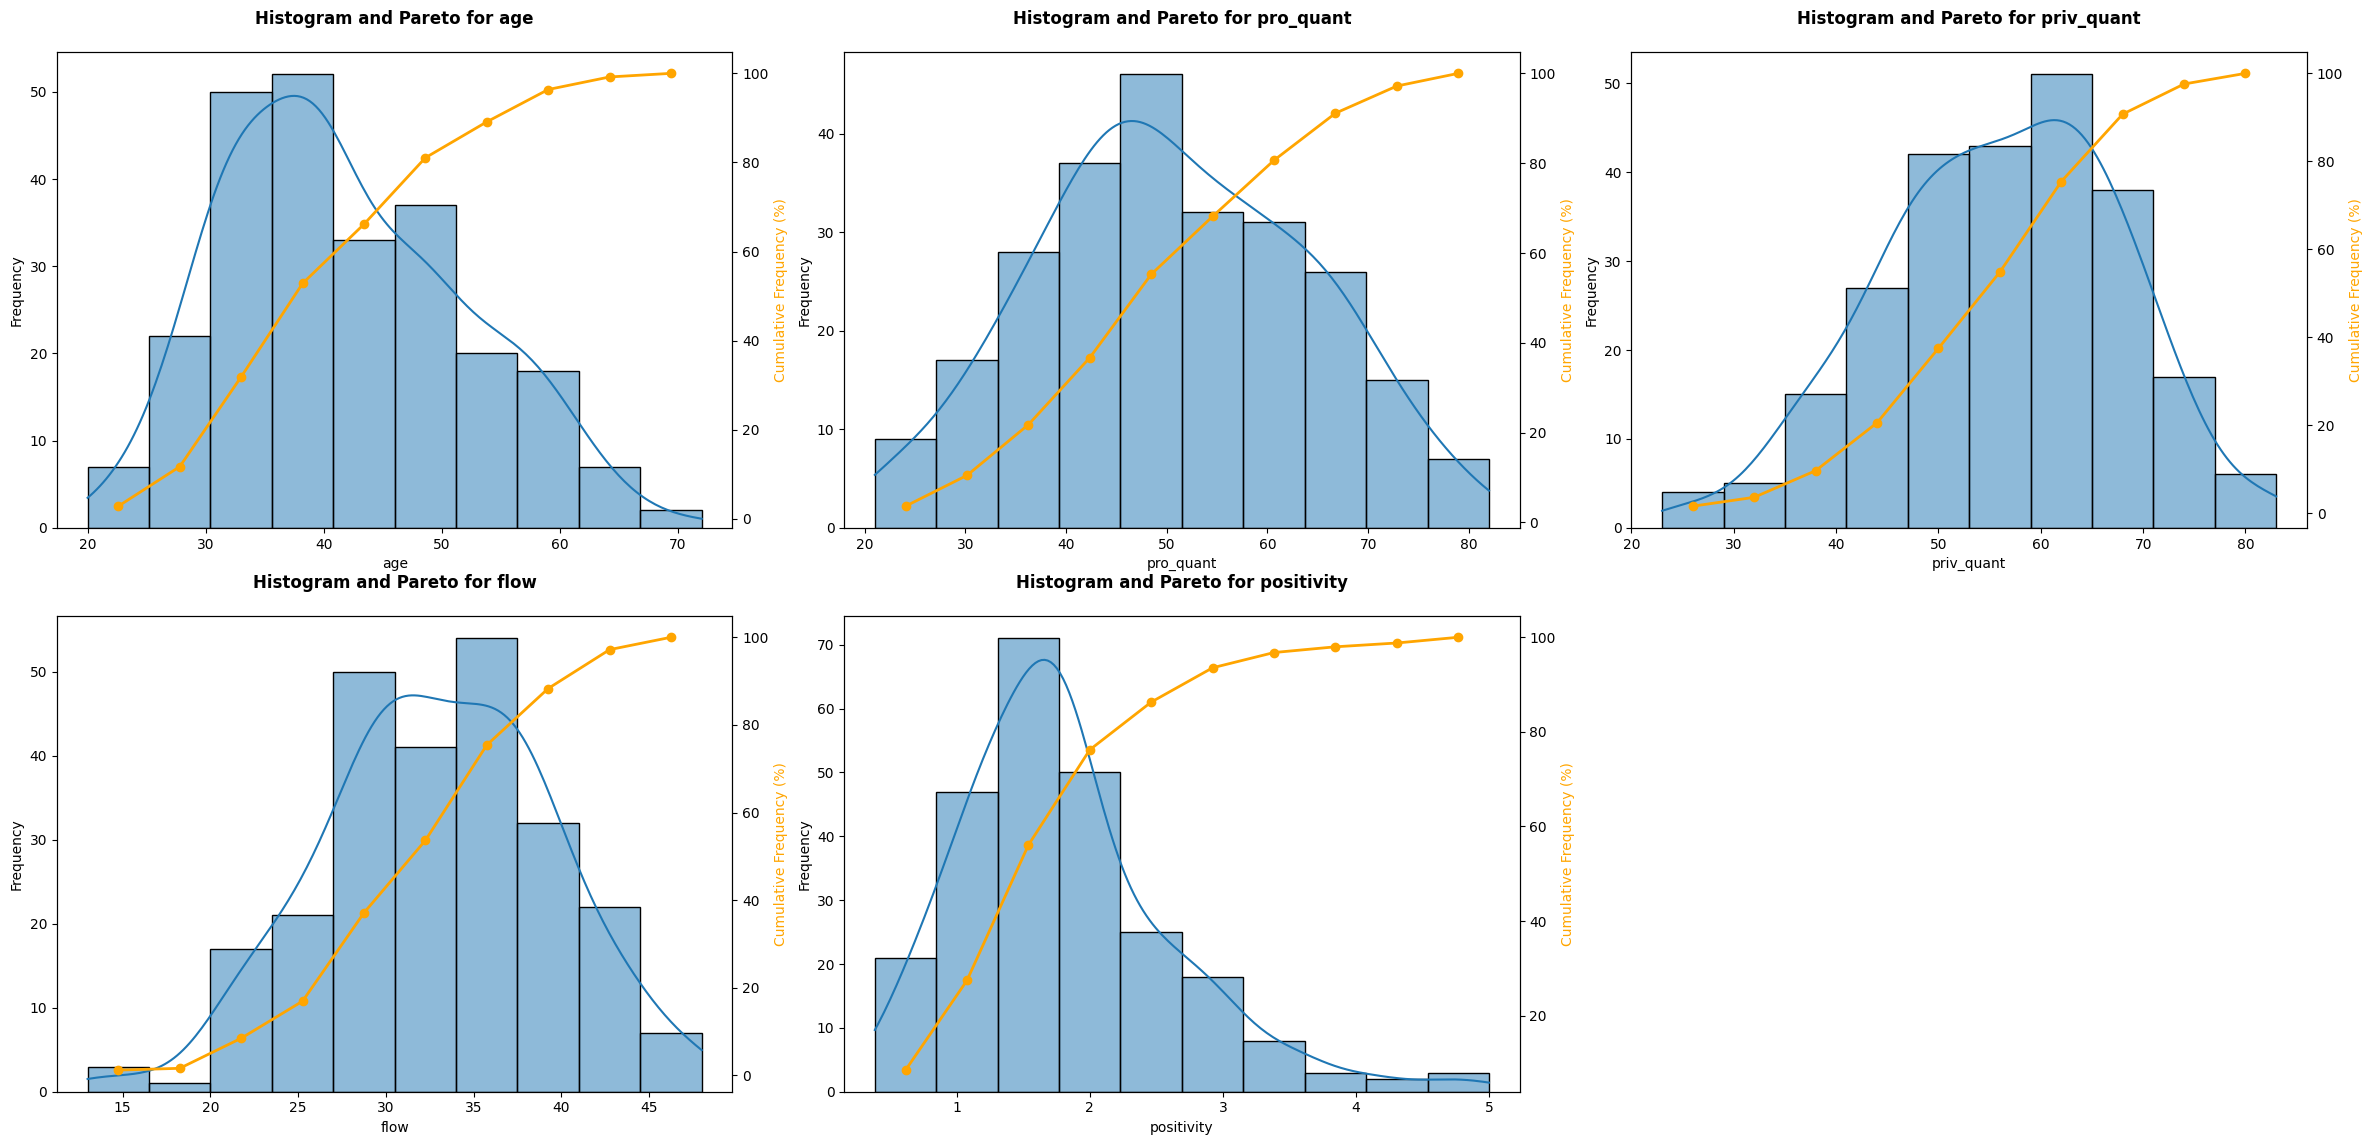

In [ ]:
hist(df,10)

#### Boxplot

In [ ]:
def boxplot(df):
    fig, axes = plt.subplots(2, 3, figsize=(25, 13))
    axes = axes.flatten()
    for i, column in enumerate(numerical_column):
        ax = axes[i]
        ax.boxplot(df[column], labels=[i])
        ax.set_title(f"Boxplot for {column}", fontsize=12, fontweight='bold',pad=30)
        ax.set_xlabel(column, fontsize=10)
        ax.set_ylabel("Frequency", fontsize=10)
    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.1)
    fig.delaxes(axes[len(numerical_column)])
    plt.show()


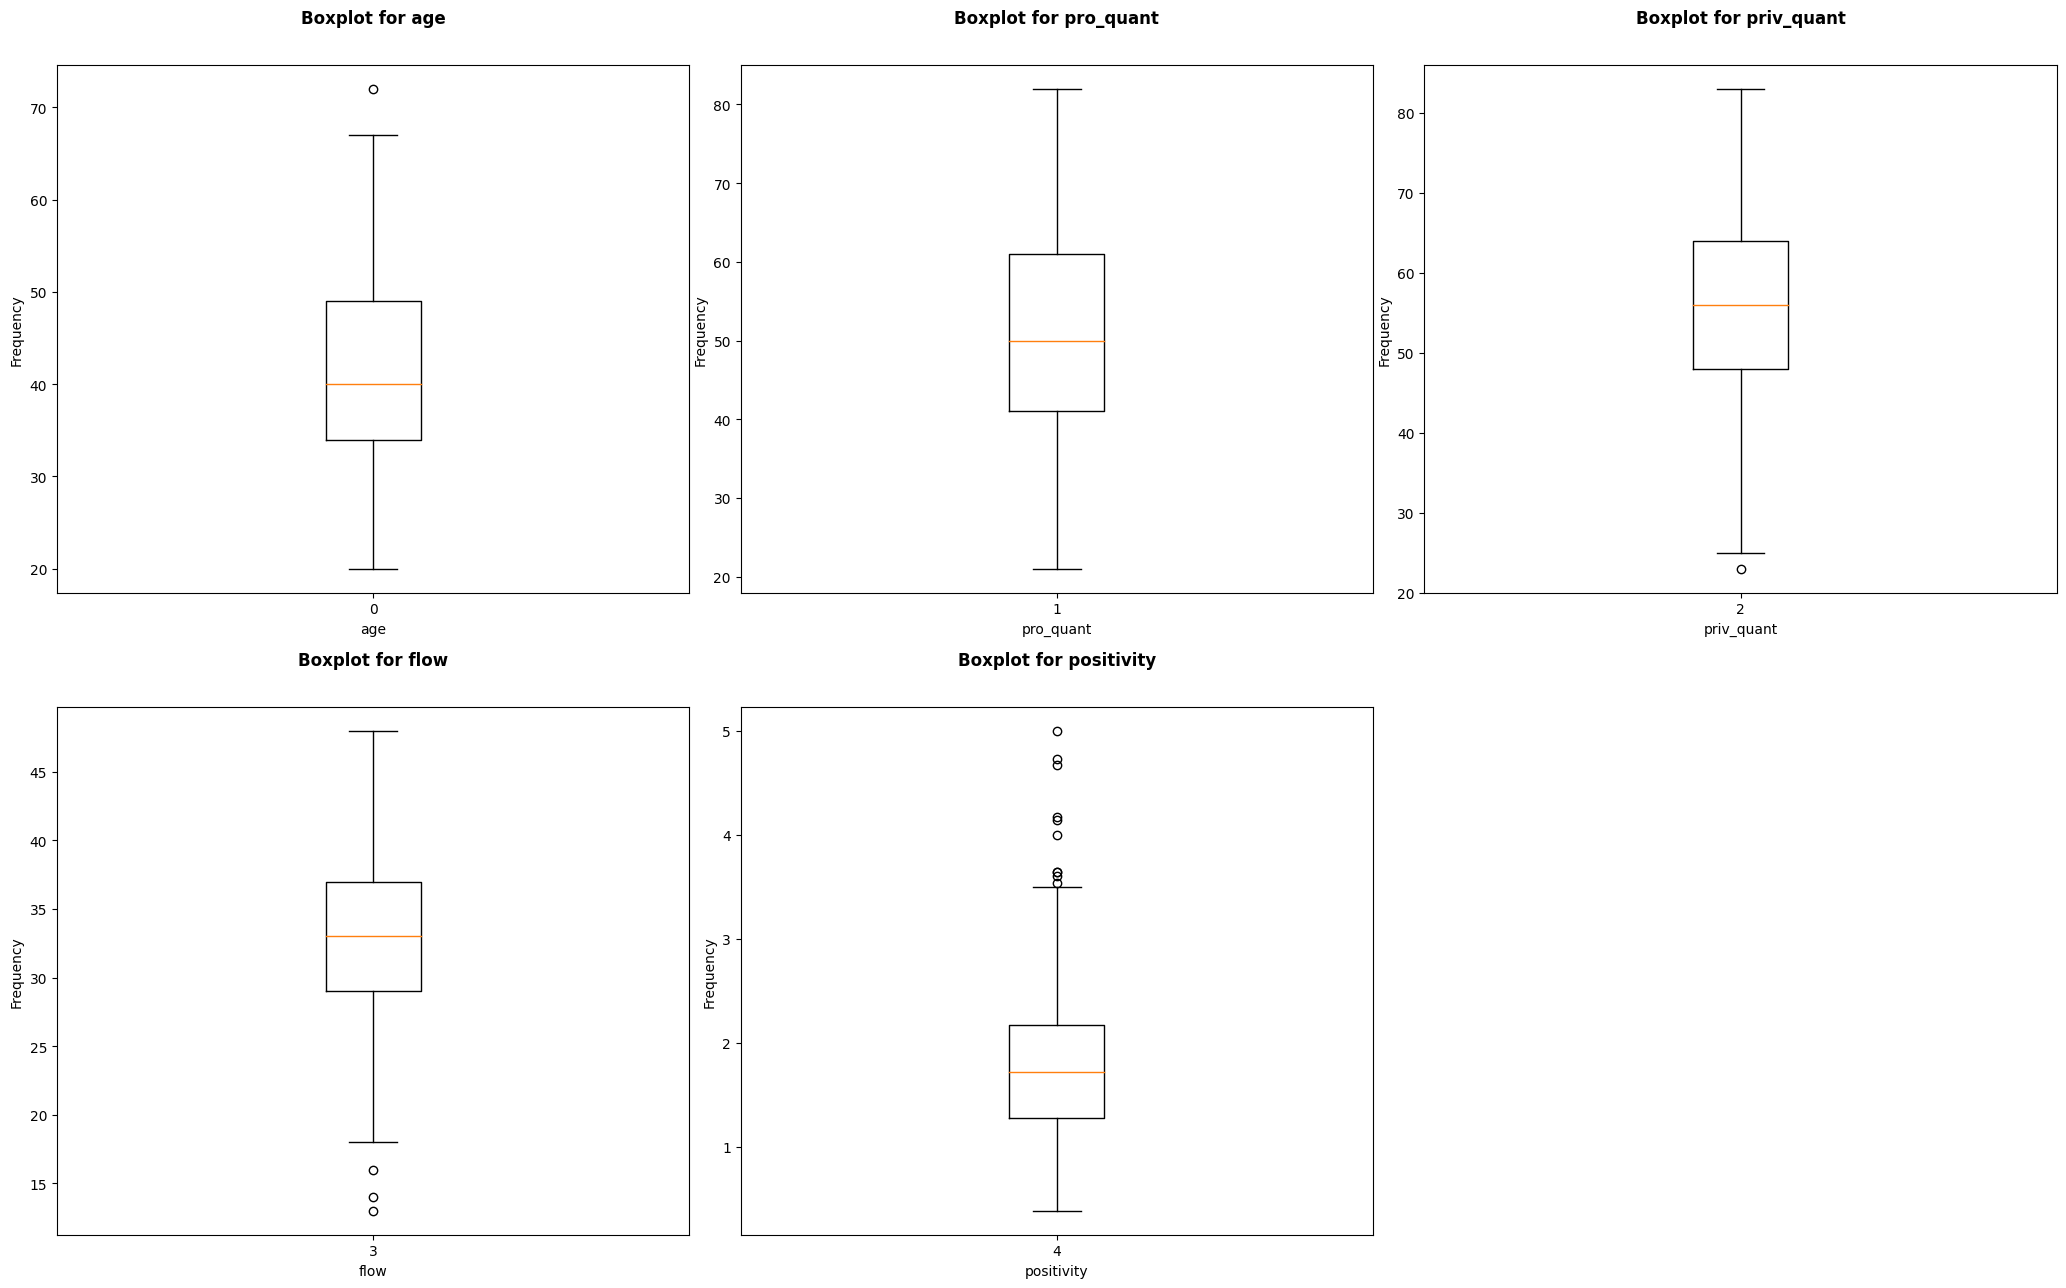

In [ ]:
   boxplot(df)

#### Log Transformation for right skewed

In [ ]:
for predictor in numerical_predictors_df:
    skewness = df[predictor].skew()
    print(f"Skewness of {predictor}: {skewness}")

Skewness of age: 0.44166550998344933
Skewness of pro_quant: 0.049480538040877646
Skewness of priv_quant: -0.22109393513618109
Skewness of flow: -0.15879555934177014


In [ ]:
df['positivity'].skew()

1.0959322654938788

In [ ]:
df['postivity_log'] = np.log1p(df['positivity'])

In [ ]:
df.head()

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,positivity_label,postivity_log
0,72,5 years or more after high school,Female,Separated/Divorced,Flourishing,82,Flourishing,83,4.142857,44,emotionally flourishing,1.637609
1,45,5 years or more after high school,Female,Separated/Divorced,Flourishing,81,Flourishing,83,4.000000,44,emotionally flourishing,1.609438
2,43,Up to 4 years after high school,Male,Single,Flourishing,79,Flourishing,78,5.000000,47,emotionally flourishing,1.791759
3,60,Completed high school degree,Female,Couple,Flourishing,79,Flourishing,82,4.666667,42,emotionally flourishing,1.734601
4,49,Completed high school degree,Female,Separated/Divorced,Flourishing,77,Flourishing,73,2.285714,33,moderately emotionally healthy,1.189584


<Axes: xlabel='postivity_log', ylabel='Count'>

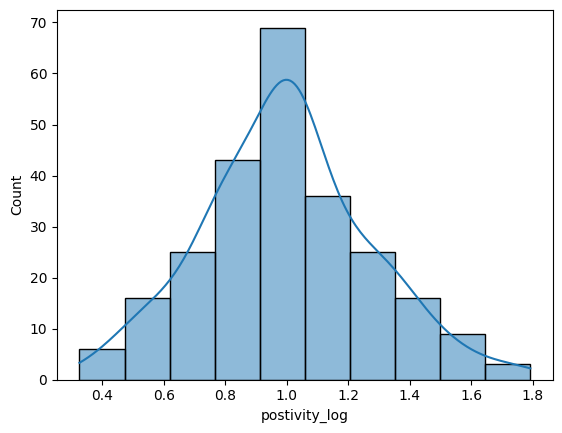

In [ ]:
sns.histplot(df["postivity_log"], bins=10, edgecolor="k", kde=True)

In [ ]:
df.head()

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,positivity_label,postivity_log
0,72,5 years or more after high school,Female,Separated/Divorced,Flourishing,82,Flourishing,83,4.142857,44,emotionally flourishing,1.637609
1,45,5 years or more after high school,Female,Separated/Divorced,Flourishing,81,Flourishing,83,4.000000,44,emotionally flourishing,1.609438
2,43,Up to 4 years after high school,Male,Single,Flourishing,79,Flourishing,78,5.000000,47,emotionally flourishing,1.791759
3,60,Completed high school degree,Female,Couple,Flourishing,79,Flourishing,82,4.666667,42,emotionally flourishing,1.734601
4,49,Completed high school degree,Female,Separated/Divorced,Flourishing,77,Flourishing,73,2.285714,33,moderately emotionally healthy,1.189584


## Bivariate Analysis


#### Contingency,chi square,cramer's v,side-by-side and stacked bar chart

In [ ]:
categorical_column

['education', 'sex', 'famstatus', 'pro_cat', 'priv_cat', 'positivity_label']

In [ ]:
def cont_chi_res(df, i, j):

    contingency_table = pd.crosstab(df[categorical_column[i]], df[categorical_column[j]])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    residuals = (contingency_table - expected) / np.sqrt(expected)
    n = contingency_table.sum().sum()
    cramer_v=np.sqrt(chi2/ (n*min(contingency_table.shape)-1))
    return contingency_table, chi2, p, dof, expected,residuals,cramer_v


Contingency Table for education and sex:
--------------------------------------------------------------------------------
sex                                   Female  Male
education                                         
5 years or more after high school         67    43
Completed high school degree              12     8
Has not completed high school degree       5     4
Up to 2 years after high school           23    16
Up to 3 years after high school           22     9
Up to 4 years after high school           22    17


Expected frequencies:
[[66.97580645 43.02419355]
 [12.17741935  7.82258065]
 [ 5.47983871  3.52016129]
 [23.74596774 15.25403226]
 [18.875      12.125     ]
 [23.74596774 15.25403226]]

Residuals:
sex                                     Female      Male
education                                               
5 years or more after high school     0.002956 -0.003688
Completed high school degree         -0.050842  0.063435
Has not completed high school degree -0.204

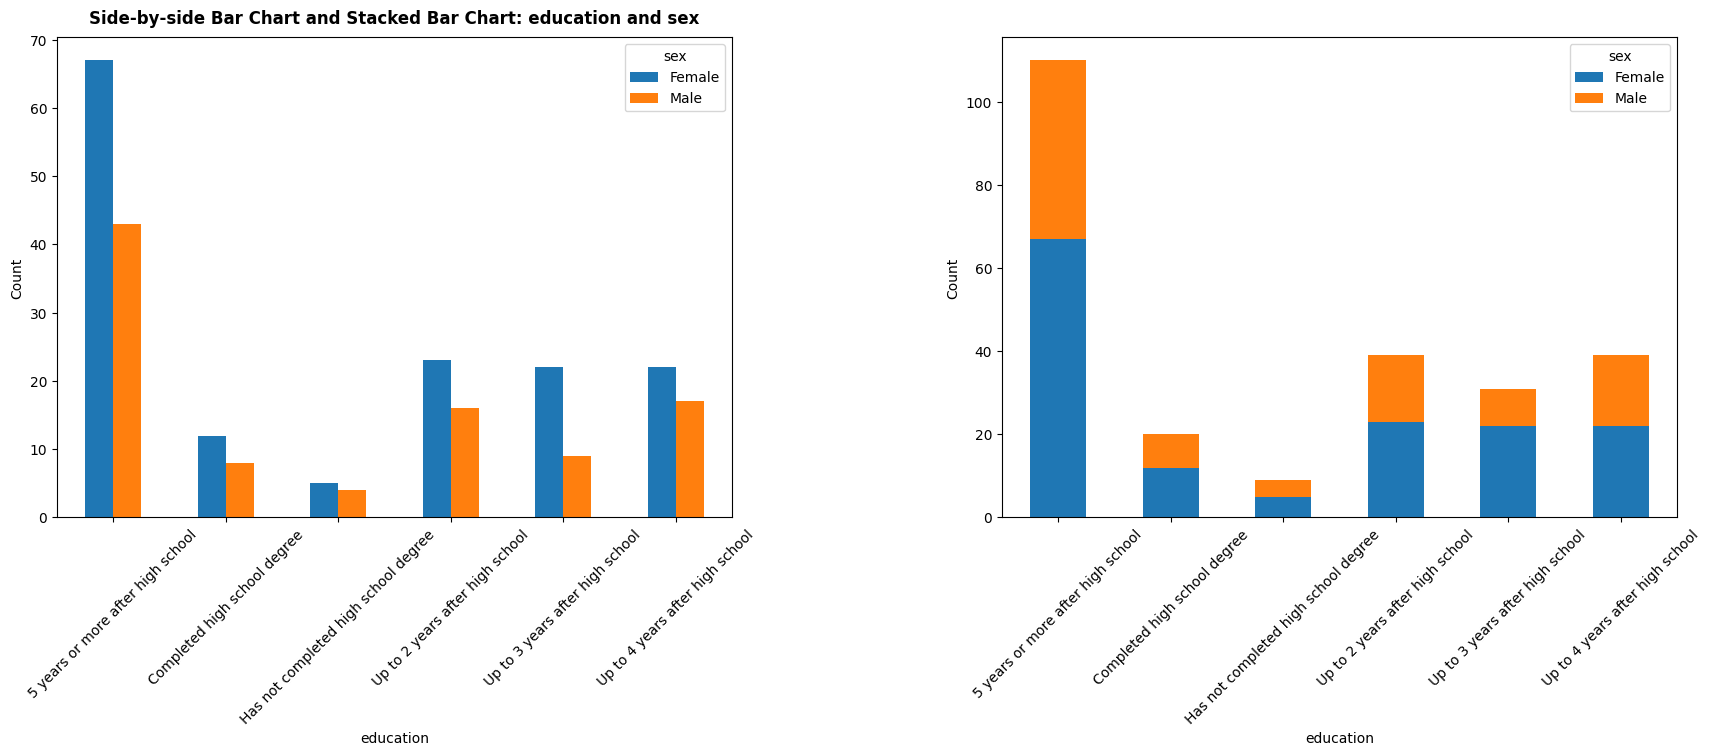

Contingency Table for education and famstatus:
--------------------------------------------------------------------------------
famstatus                             Couple  Separated/Divorced  Single
education                                                               
5 years or more after high school         84                  10      16
Completed high school degree              10                   4       6
Has not completed high school degree       7                   1       1
Up to 2 years after high school           27                   7       5
Up to 3 years after high school           18                   7       6
Up to 4 years after high school           27                   6       6


Expected frequencies:
[[76.73387097 15.52419355 17.74193548]
 [13.9516129   2.82258065  3.22580645]
 [ 6.27822581  1.27016129  1.4516129 ]
 [27.20564516  5.50403226  6.29032258]
 [21.625       4.375       5.        ]
 [27.20564516  5.50403226  6.29032258]]

Residuals:
famstatus        

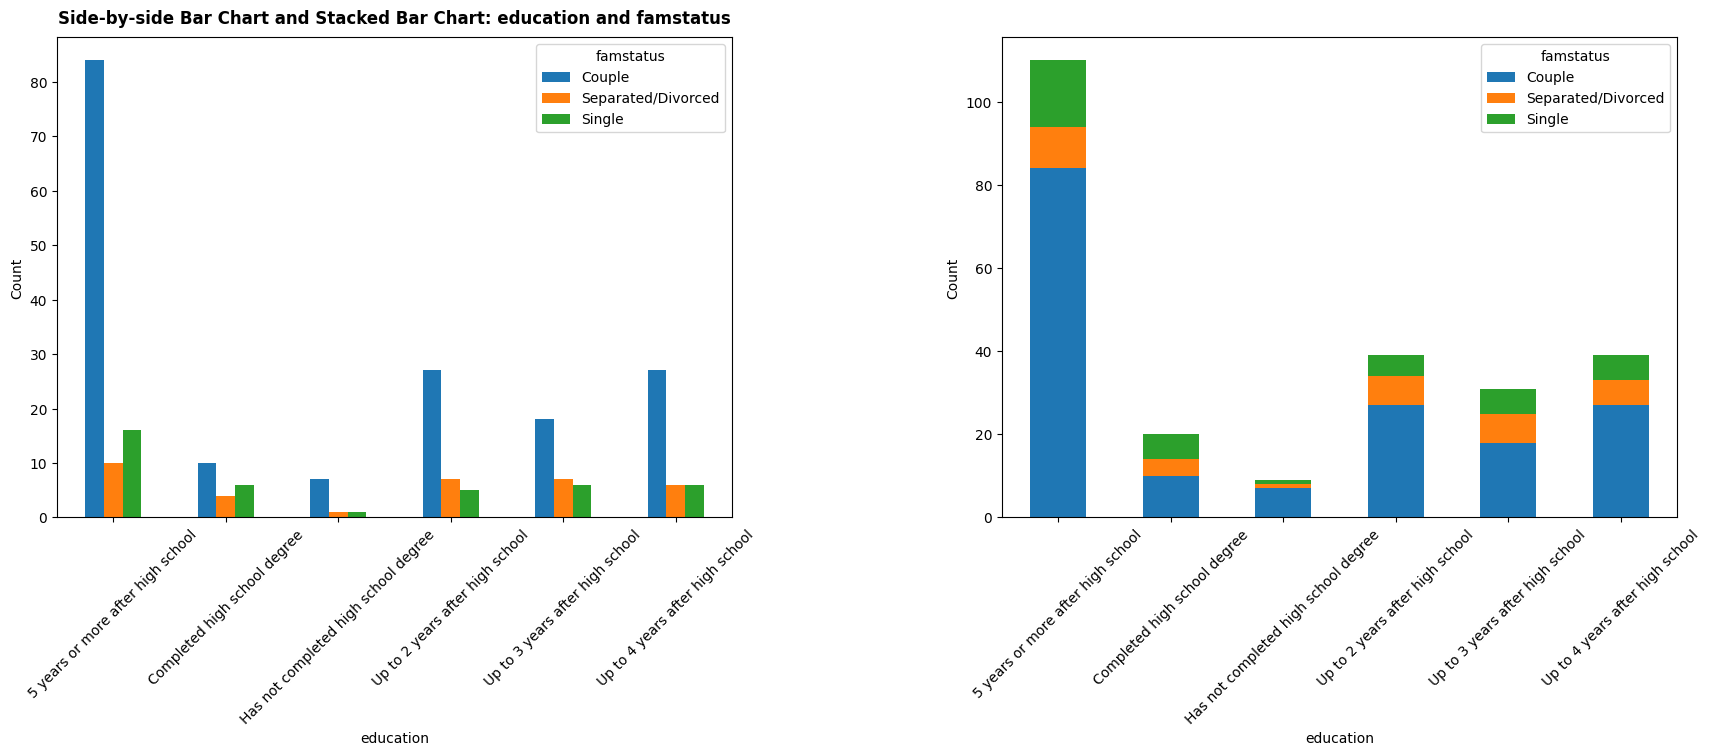

Contingency Table for education and pro_cat:
--------------------------------------------------------------------------------
pro_cat                               Flourishing  Languishing  Moderately Mentally Healthy
education                                                                                  
5 years or more after high school              17           20                           73
Completed high school degree                    8            2                           10
Has not completed high school degree            2            0                            7
Up to 2 years after high school                11            6                           22
Up to 3 years after high school                 4            6                           21
Up to 4 years after high school                 9            4                           26


Expected frequencies:
[[22.62096774 16.85483871 70.52419355]
 [ 4.11290323  3.06451613 12.82258065]
 [ 1.85080645  1.37903226  5.7701612

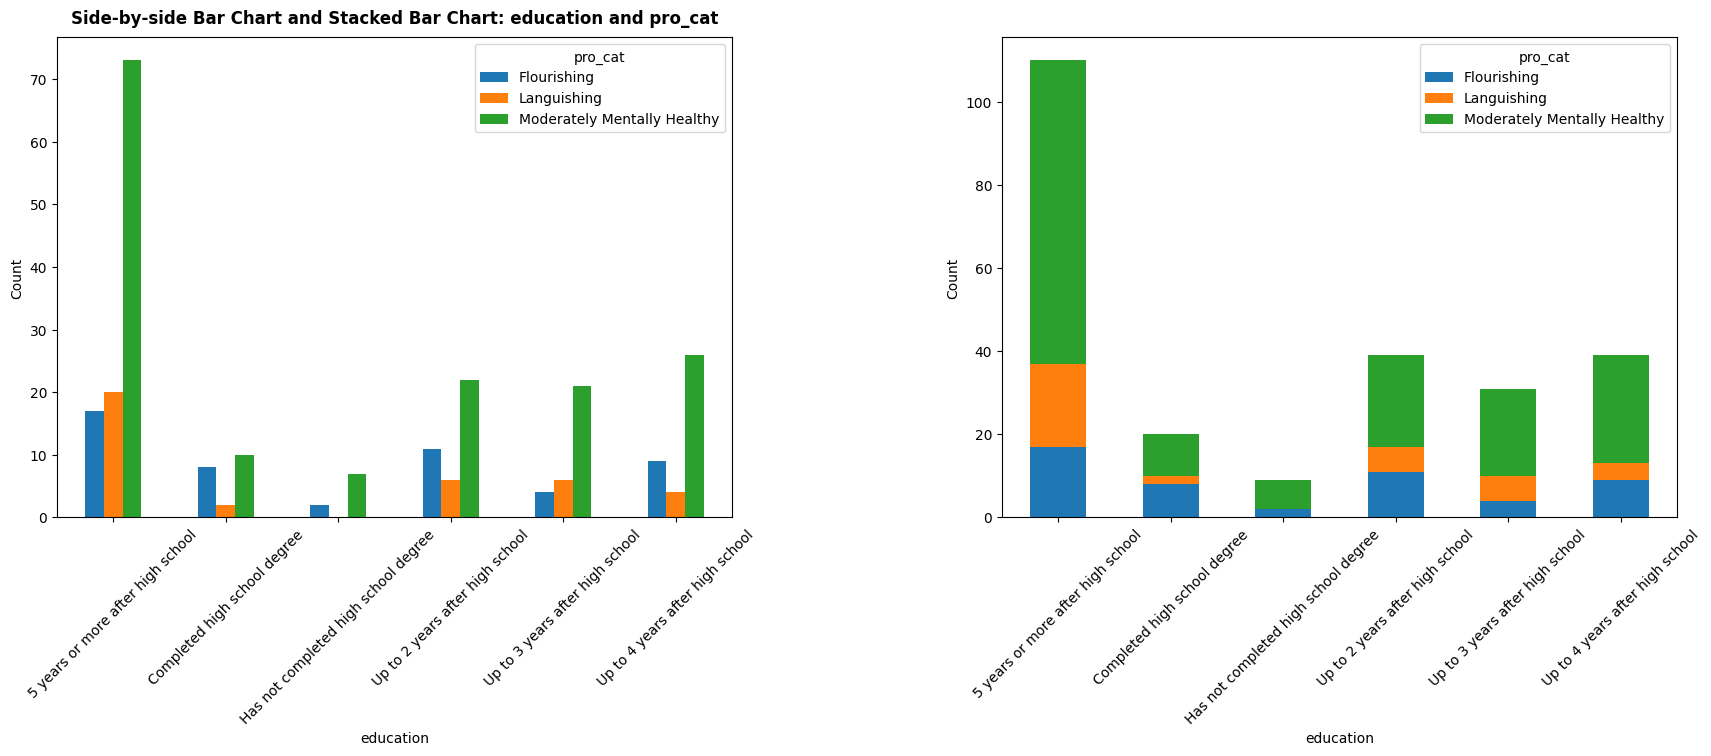

Contingency Table for education and priv_cat:
--------------------------------------------------------------------------------
priv_cat                              Flourishing  Languishing  Moderately Mentally Healthy
education                                                                                  
5 years or more after high school              28            7                           75
Completed high school degree                   11            1                            8
Has not completed high school degree            1            1                            7
Up to 2 years after high school                 9            2                           28
Up to 3 years after high school                11            1                           19
Up to 4 years after high school                10            2                           27


Expected frequencies:
[[31.0483871   6.20967742 72.74193548]
 [ 5.64516129  1.12903226 13.22580645]
 [ 2.54032258  0.50806452  5.951612

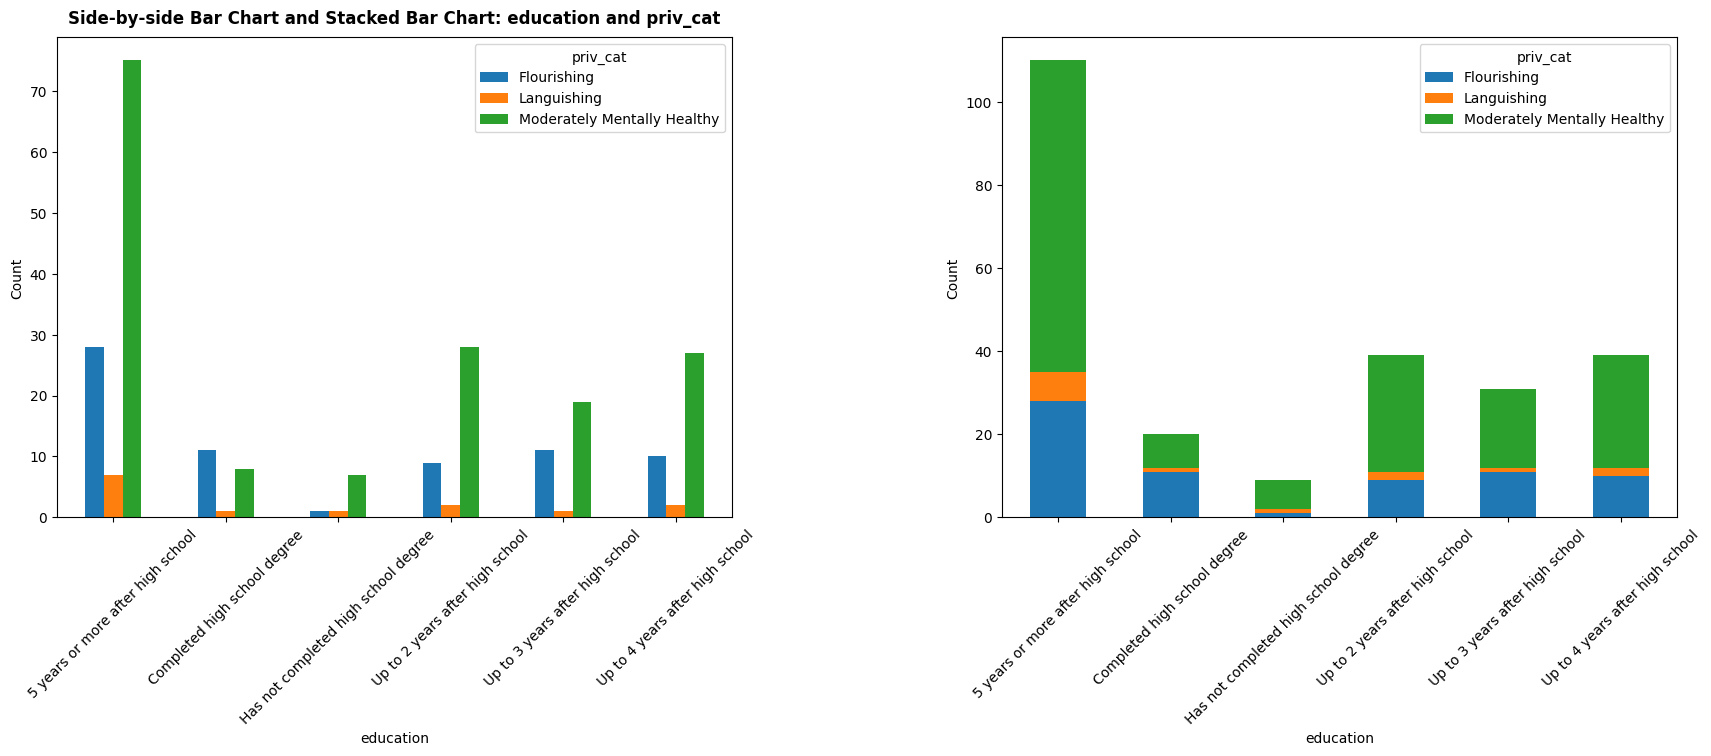

Contingency Table for education and positivity_label:
--------------------------------------------------------------------------------
positivity_label                      depressed  emotionally flourishing  languishing  moderately emotionally healthy
education                                                                                                            
5 years or more after high school            17                       10           69                              14
Completed high school degree                  2                        1            8                               9
Has not completed high school degree          1                        1            4                               3
Up to 2 years after high school               4                        1           24                              10
Up to 3 years after high school               1                        2           14                              14
Up to 4 years after high school        

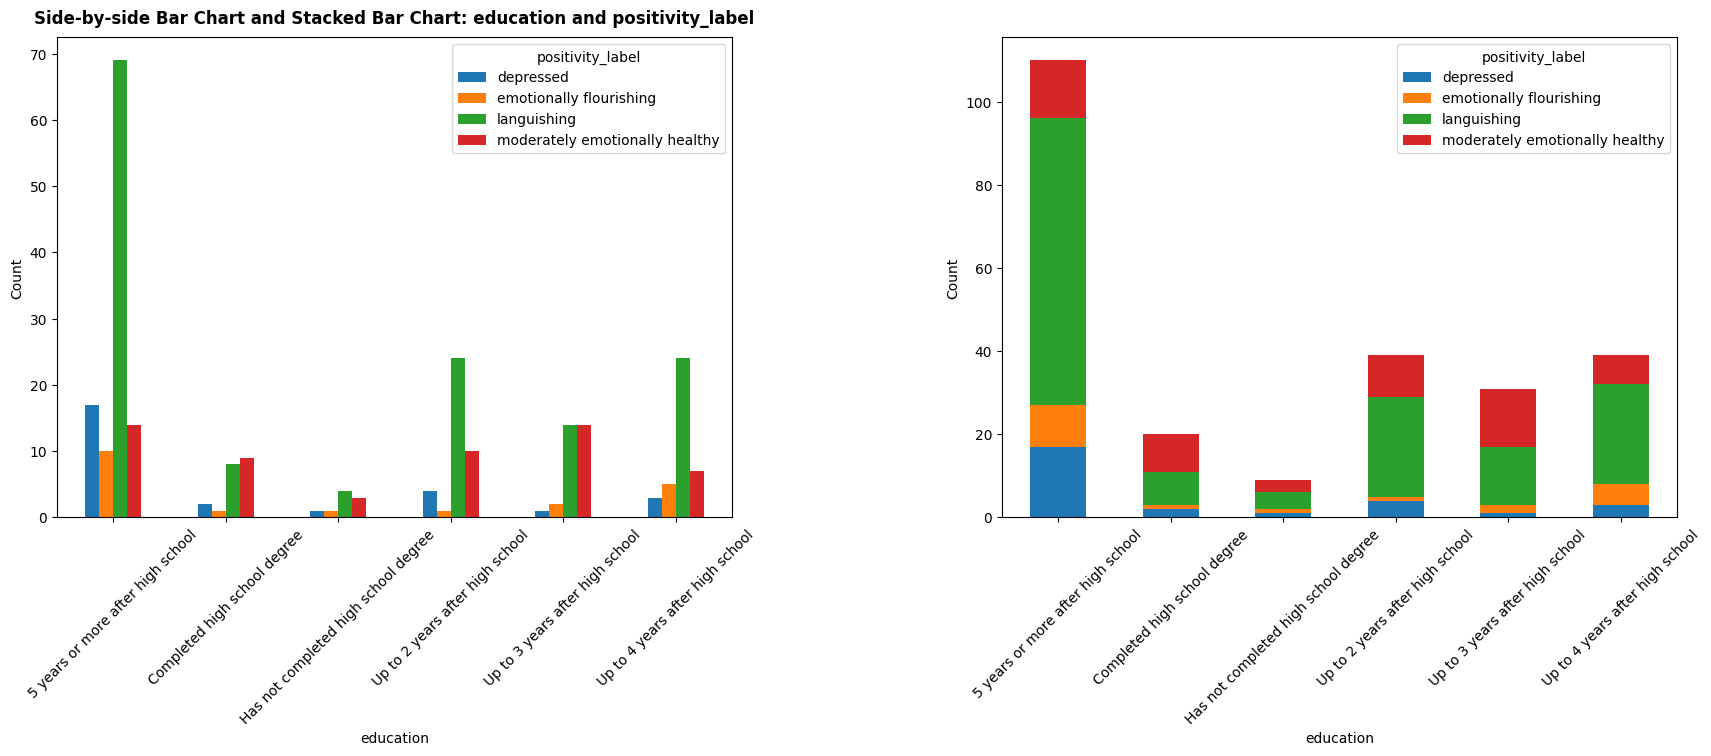

Contingency Table for sex and famstatus:
--------------------------------------------------------------------------------
famstatus  Couple  Separated/Divorced  Single
sex                                          
Female         99                  29      23
Male           74                   6      17


Expected frequencies:
[[105.33467742  21.31048387  24.35483871]
 [ 67.66532258  13.68951613  15.64516129]]

Residuals:
famstatus    Couple  Separated/Divorced    Single
sex                                              
Female    -0.617218            1.665721 -0.274533
Male       0.770090           -2.078284  0.342529

Chi-square statistic: 8.26058510895296

P-value: 0.01607817439257878

Degrees of freedom: 2

Cramer's V: 0.1291822384275698



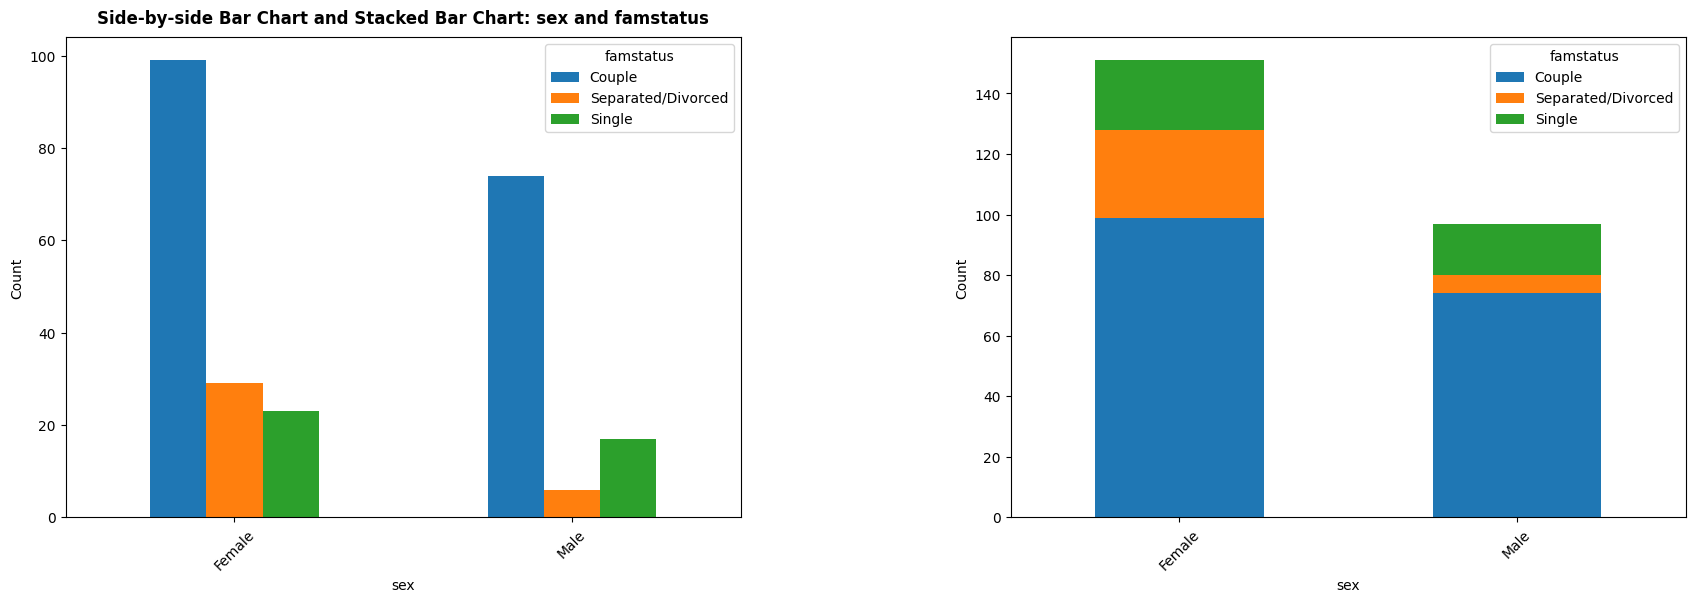

Contingency Table for sex and pro_cat:
--------------------------------------------------------------------------------
pro_cat  Flourishing  Languishing  Moderately Mentally Healthy
sex                                                           
Female            29           24                           98
Male              22           14                           61


Expected frequencies:
[[31.05241935 23.13709677 96.81048387]
 [19.94758065 14.86290323 62.18951613]]

Residuals:
pro_cat  Flourishing  Languishing  Moderately Mentally Healthy
sex                                                           
Female     -0.368314     0.179394                     0.120895
Male        0.459538    -0.223826                    -0.150838

Chi-square statistic: 0.4664780874312233

P-value: 0.7919642368215398

Degrees of freedom: 2

Cramer's V: 0.03069820800321302



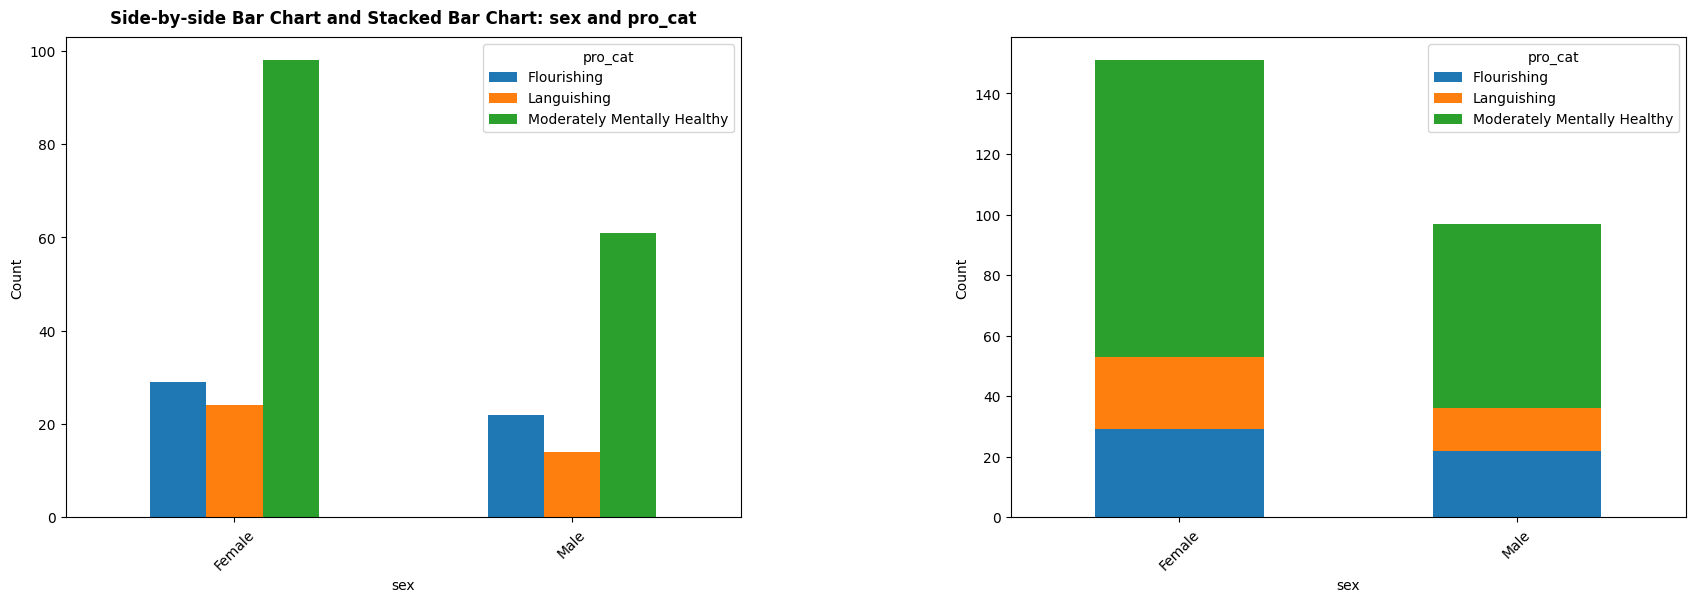

Contingency Table for sex and priv_cat:
--------------------------------------------------------------------------------
priv_cat  Flourishing  Languishing  Moderately Mentally Healthy
sex                                                            
Female             41            7                          103
Male               29            7                           61


Expected frequencies:
[[42.62096774  8.52419355 99.85483871]
 [27.37903226  5.47580645 64.14516129]]

Residuals:
priv_cat  Flourishing  Languishing  Moderately Mentally Healthy
sex                                                            
Female      -0.248292    -0.522052                     0.314745
Male         0.309789     0.651352                    -0.392700

Chi-square statistic: 1.1076933617115814

P-value: 0.5747347316719426

Degrees of freedom: 2

Cramer's V: 0.04730501418553961



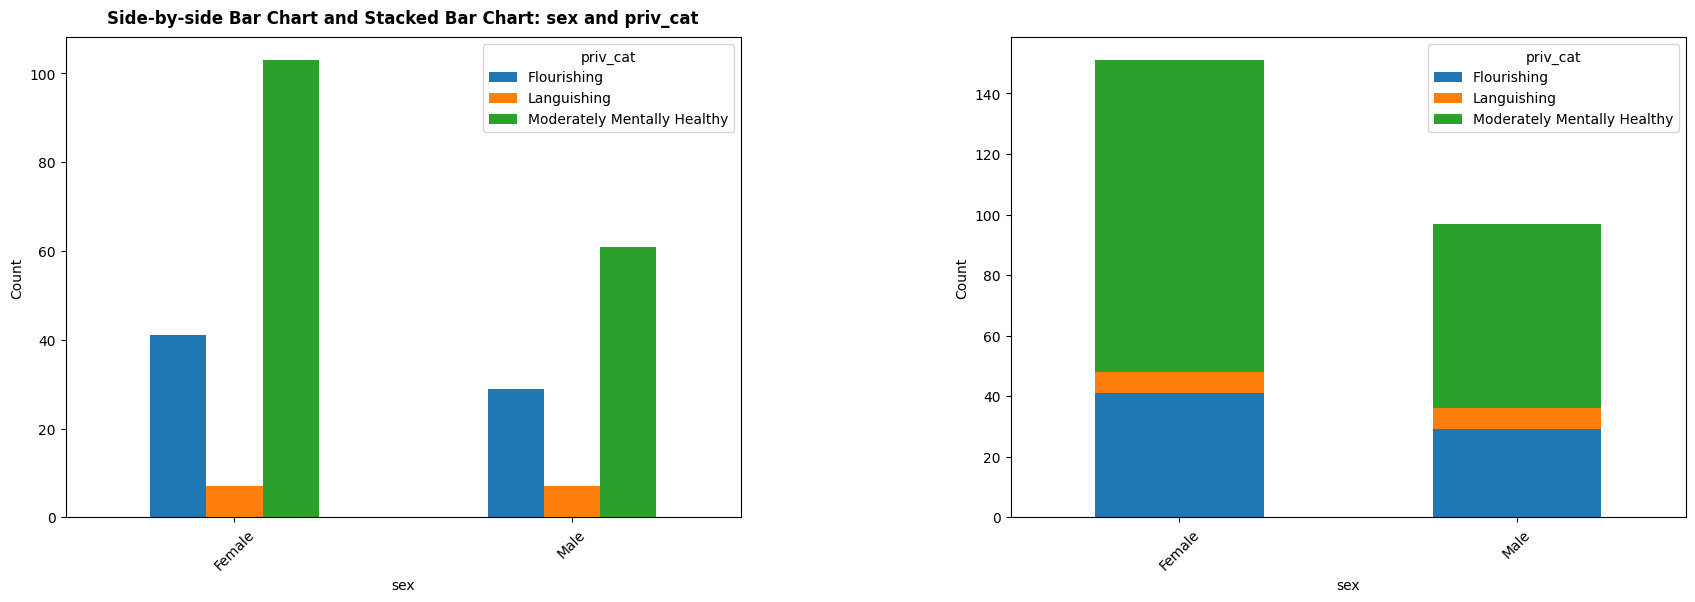

Contingency Table for sex and positivity_label:
--------------------------------------------------------------------------------
positivity_label  depressed  emotionally flourishing  languishing  moderately emotionally healthy
sex                                                                                              
Female                   19                        8           91                              33
Male                      9                       12           52                              24


Expected frequencies:
[[17.0483871  12.17741935 87.06854839 34.70564516]
 [10.9516129   7.82258065 55.93145161 22.29435484]]

Residuals:
positivity_label  depressed  emotionally flourishing  languishing  moderately emotionally healthy
sex                                                                                              
Female             0.472663                -1.197100     0.421330                       -0.289527
Male              -0.589732                 1.

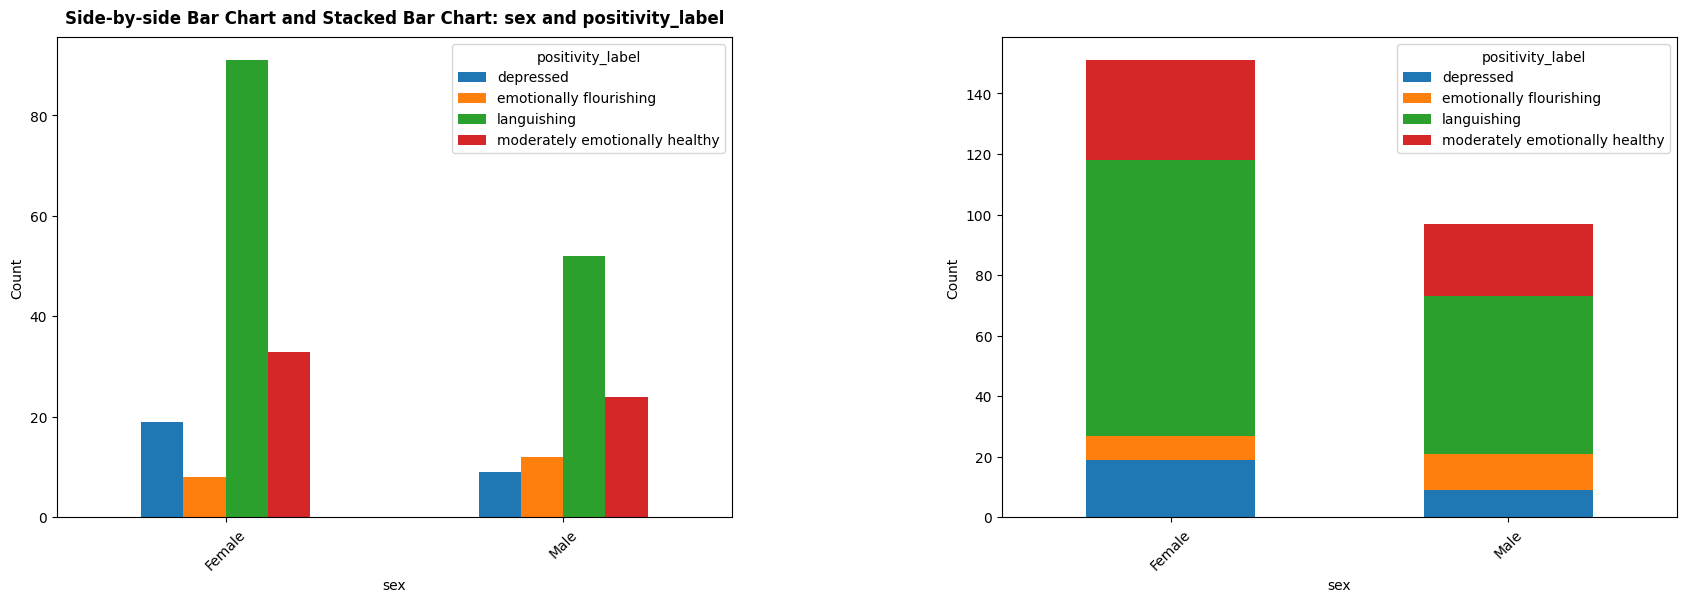

Contingency Table for famstatus and pro_cat:
--------------------------------------------------------------------------------
pro_cat             Flourishing  Languishing  Moderately Mentally Healthy
famstatus                                                                
Couple                       35           23                          115
Separated/Divorced            6            8                           21
Single                       10            7                           23


Expected frequencies:
[[ 35.5766129   26.50806452 110.91532258]
 [  7.19758065   5.36290323  22.43951613]
 [  8.22580645   6.12903226  25.64516129]]

Residuals:
pro_cat             Flourishing  Languishing  Moderately Mentally Healthy
famstatus                                                                
Couple                -0.096672    -0.681363                     0.387848
Separated/Divorced    -0.446387     1.138744                    -0.303885
Single                 0.618603     0.351808 

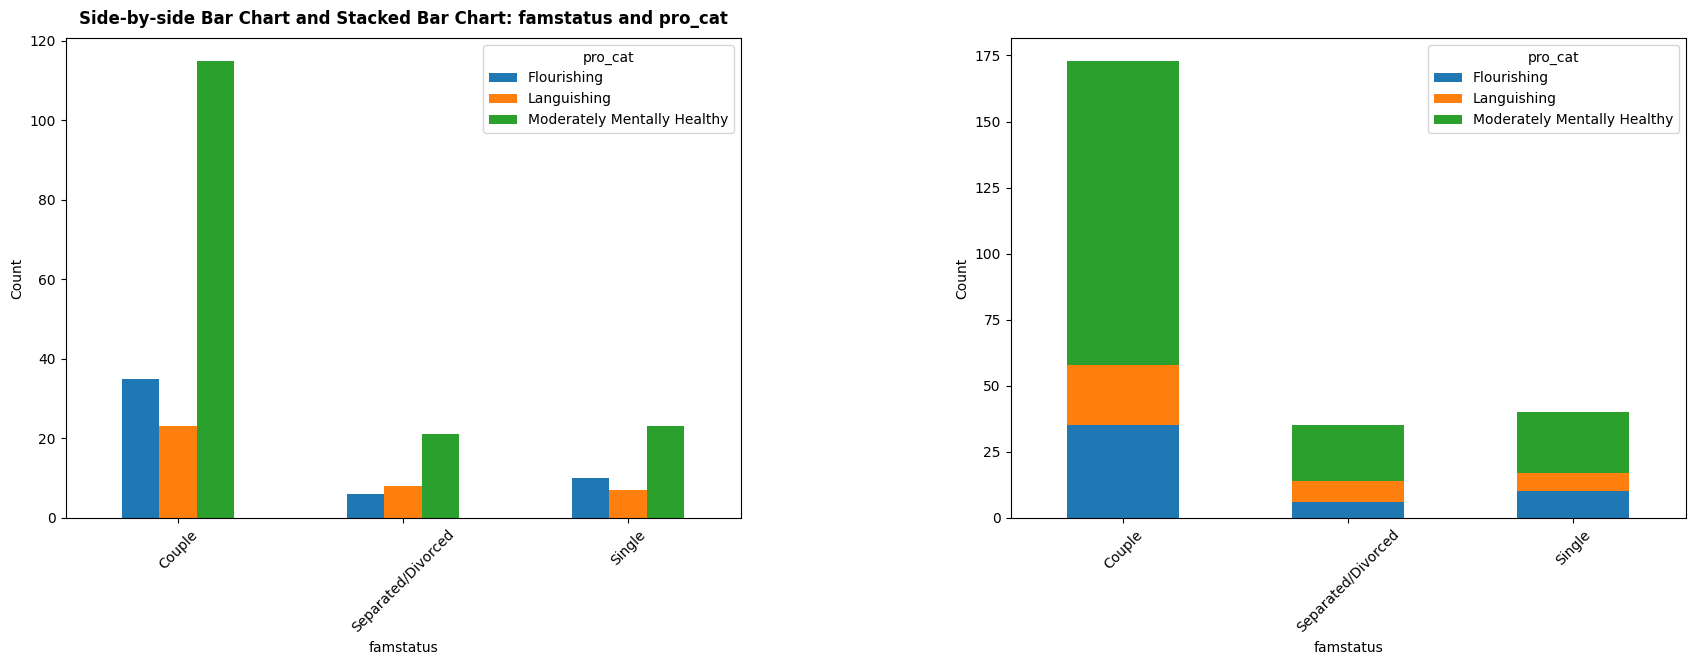

Contingency Table for famstatus and priv_cat:
--------------------------------------------------------------------------------
priv_cat            Flourishing  Languishing  Moderately Mentally Healthy
famstatus                                                                
Couple                       54            5                          114
Separated/Divorced            7            3                           25
Single                        9            6                           25


Expected frequencies:
[[ 48.83064516   9.76612903 114.40322581]
 [  9.87903226   1.97580645  23.14516129]
 [ 11.29032258   2.25806452  26.4516129 ]]

Residuals:
priv_cat            Flourishing  Languishing  Moderately Mentally Healthy
famstatus                                                                
Couple                 0.739759    -1.525122                    -0.037699
Separated/Divorced    -0.915987     0.728635                     0.385546
Single                -0.681622     2.490165

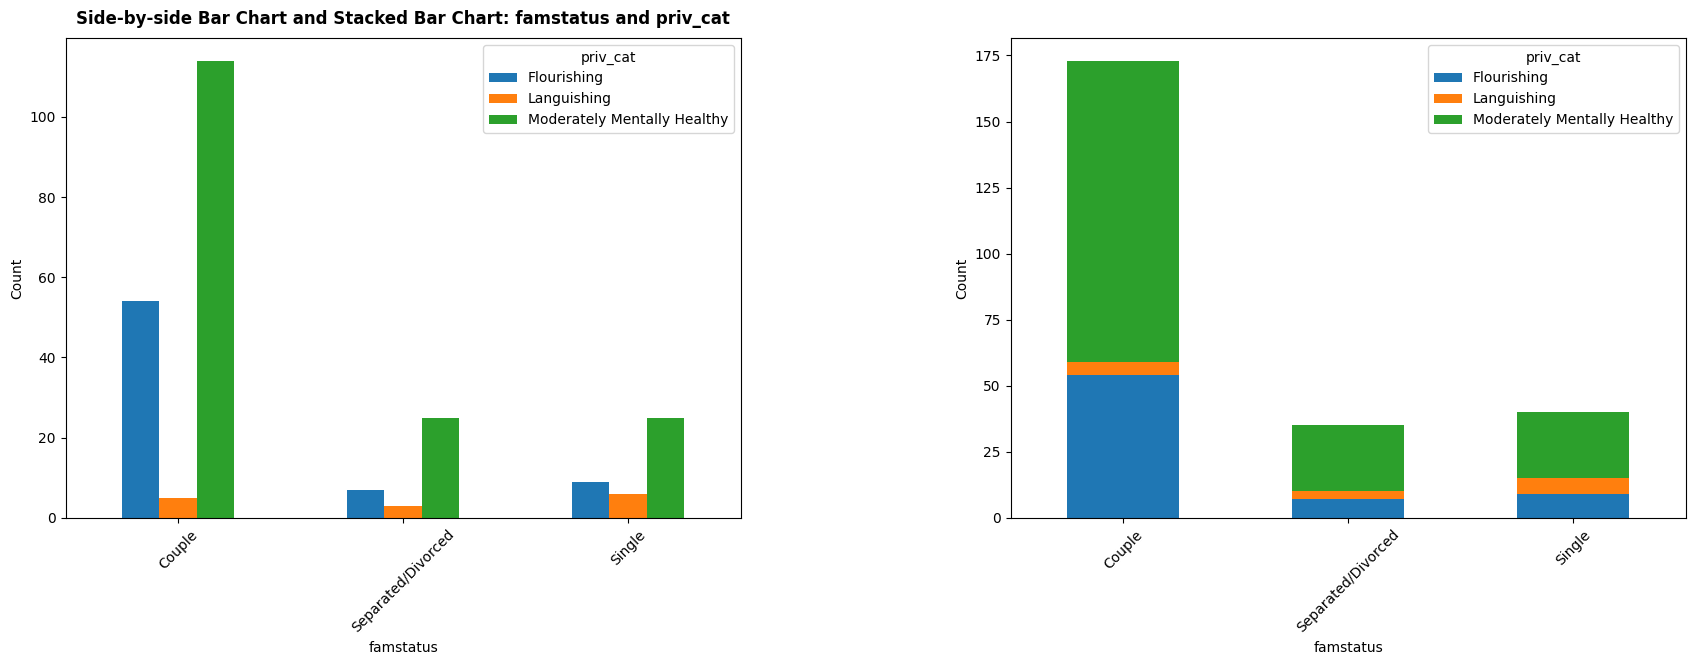

Contingency Table for famstatus and positivity_label:
--------------------------------------------------------------------------------
positivity_label    depressed  emotionally flourishing  languishing  moderately emotionally healthy
famstatus                                                                                          
Couple                     15                       15          100                              43
Separated/Divorced          6                        3           20                               6
Single                      7                        2           23                               8


Expected frequencies:
[[19.53225806 13.9516129  99.75403226 39.76209677]
 [ 3.9516129   2.82258065 20.18145161  8.04435484]
 [ 4.51612903  3.22580645 23.06451613  9.19354839]]

Residuals:
positivity_label    depressed  emotionally flourishing  languishing  moderately emotionally healthy
famstatus                                                                  

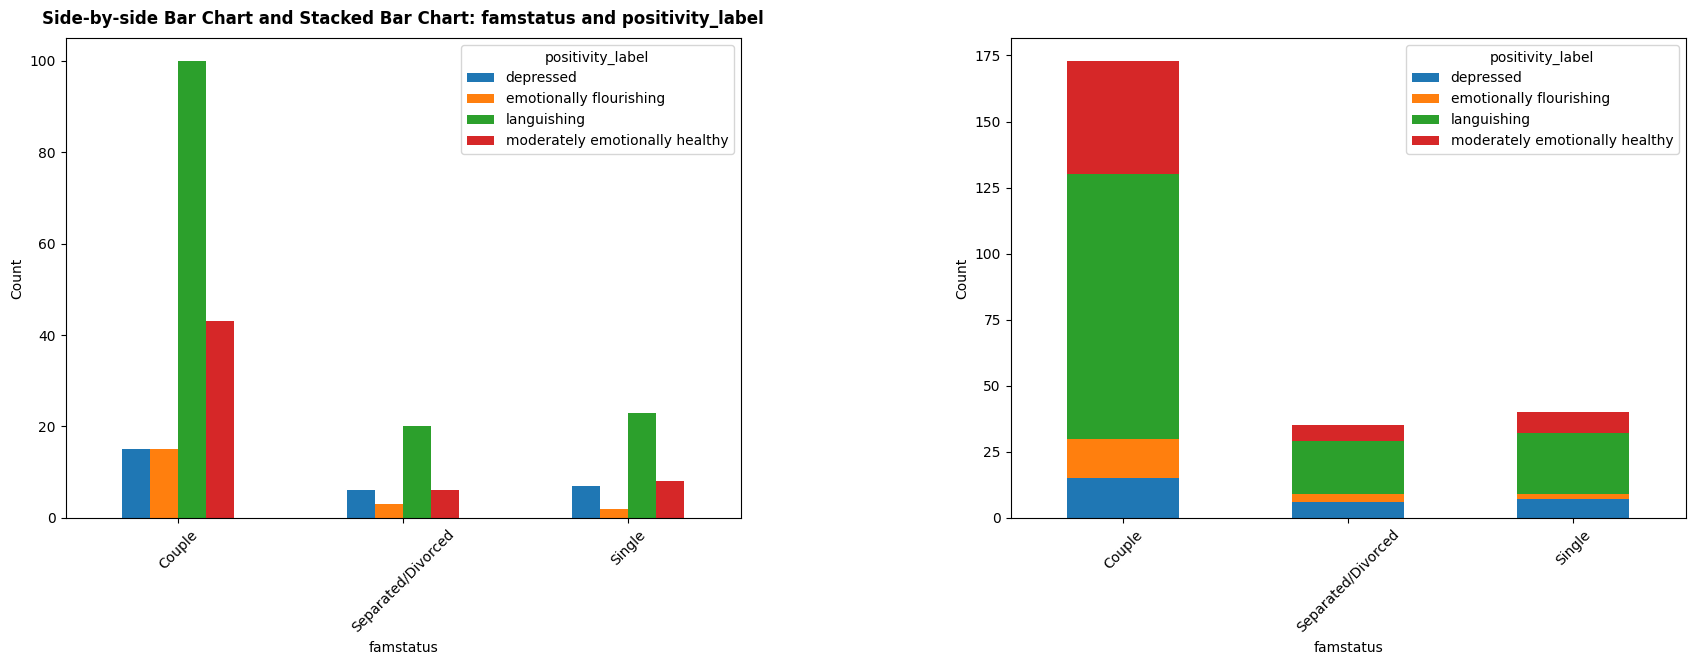

Contingency Table for pro_cat and priv_cat:
--------------------------------------------------------------------------------
priv_cat                     Flourishing  Languishing  Moderately Mentally Healthy
pro_cat                                                                           
Flourishing                           35            1                           15
Languishing                            3            8                           27
Moderately Mentally Healthy           32            5                          122


Expected frequencies:
[[ 14.39516129   2.87903226  33.72580645]
 [ 10.72580645   2.14516129  25.12903226]
 [ 44.87903226   8.97580645 105.14516129]]

Residuals:
priv_cat                     Flourishing  Languishing  Moderately Mentally Healthy
pro_cat                                                                           
Flourishing                     5.430764    -1.107416                    -3.224478
Languishing                    -2.359005     3.9

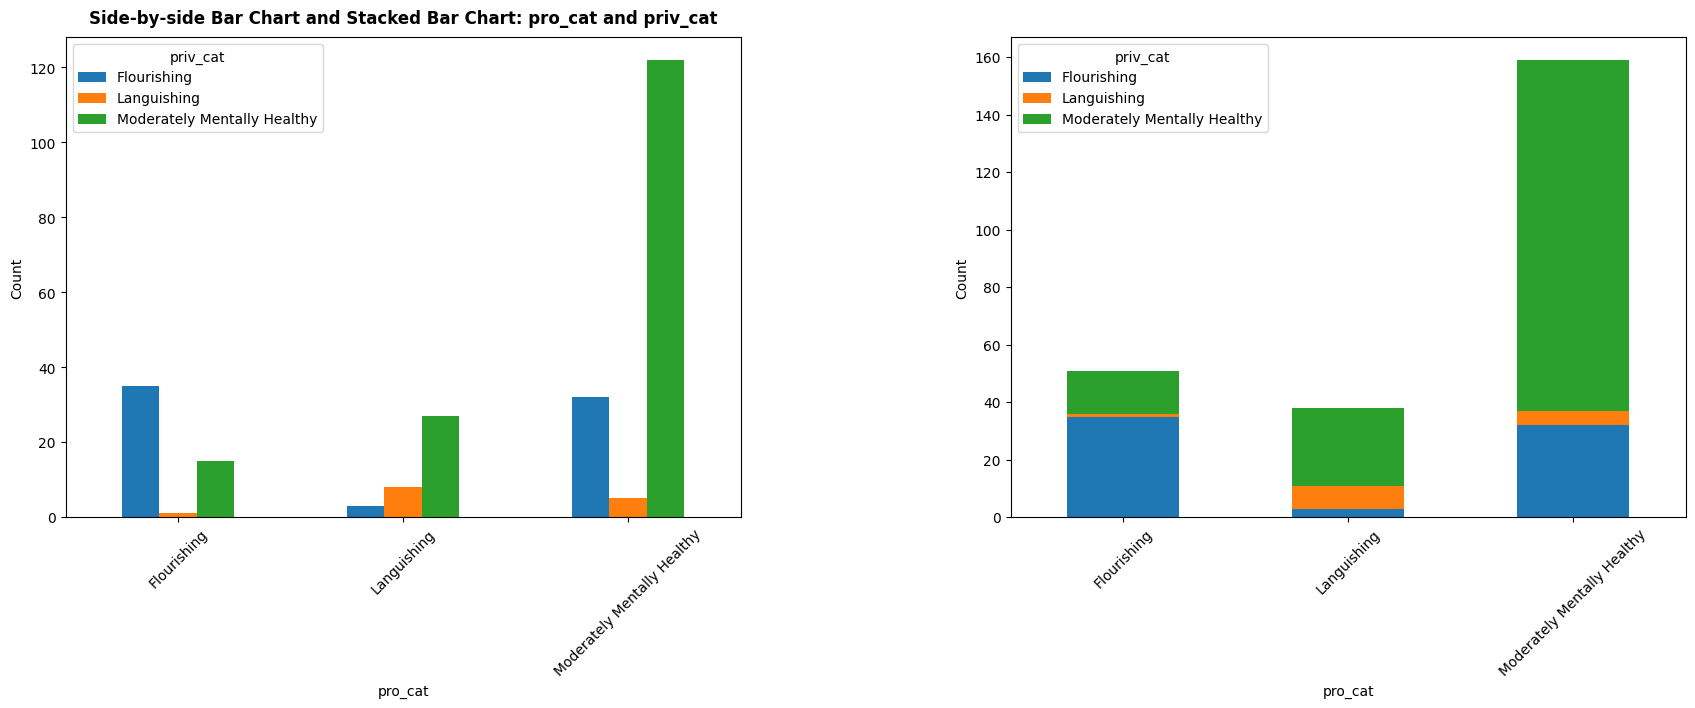

Contingency Table for pro_cat and positivity_label:
--------------------------------------------------------------------------------
positivity_label             depressed  emotionally flourishing  languishing  moderately emotionally healthy
pro_cat                                                                                                     
Flourishing                          0                       11           12                              28
Languishing                         15                        1           20                               2
Moderately Mentally Healthy         13                        8          111                              27


Expected frequencies:
[[ 5.75806452  4.11290323 29.40725806 11.72177419]
 [ 4.29032258  3.06451613 21.91129032  8.73387097]
 [17.9516129  12.82258065 91.68145161 36.54435484]]

Residuals:
positivity_label             depressed  emotionally flourishing  languishing  moderately emotionally healthy
pro_cat                

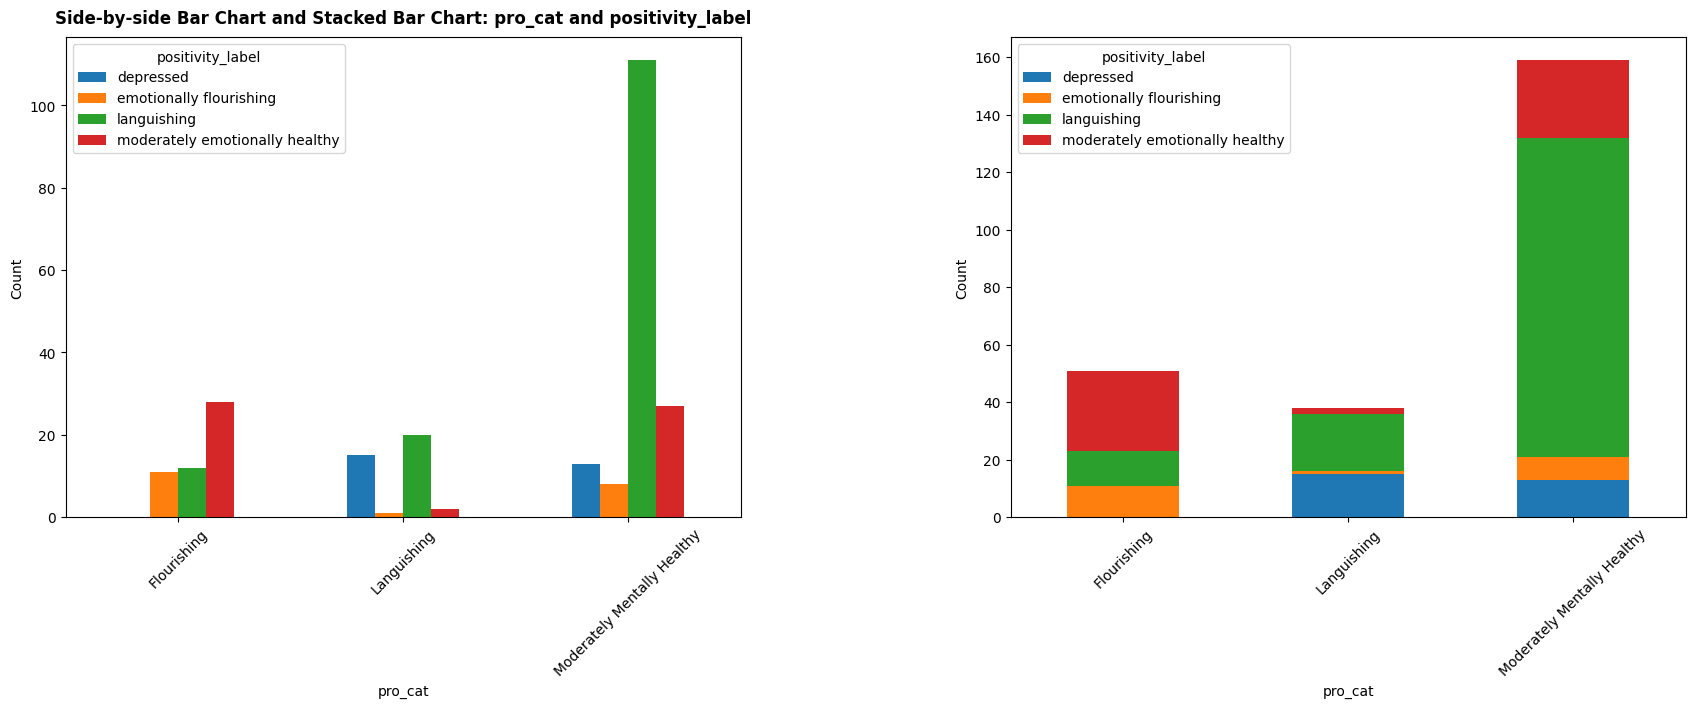

Contingency Table for priv_cat and positivity_label:
--------------------------------------------------------------------------------
positivity_label             depressed  emotionally flourishing  languishing  moderately emotionally healthy
priv_cat                                                                                                    
Flourishing                          1                       11           24                              34
Languishing                          8                        0            5                               1
Moderately Mentally Healthy         19                        9          114                              22


Expected frequencies:
[[ 7.90322581  5.64516129 40.36290323 16.08870968]
 [ 1.58064516  1.12903226  8.07258065  3.21774194]
 [18.51612903 13.22580645 94.56451613 37.69354839]]

Residuals:
positivity_label             depressed  emotionally flourishing  languishing  moderately emotionally healthy
priv_cat              

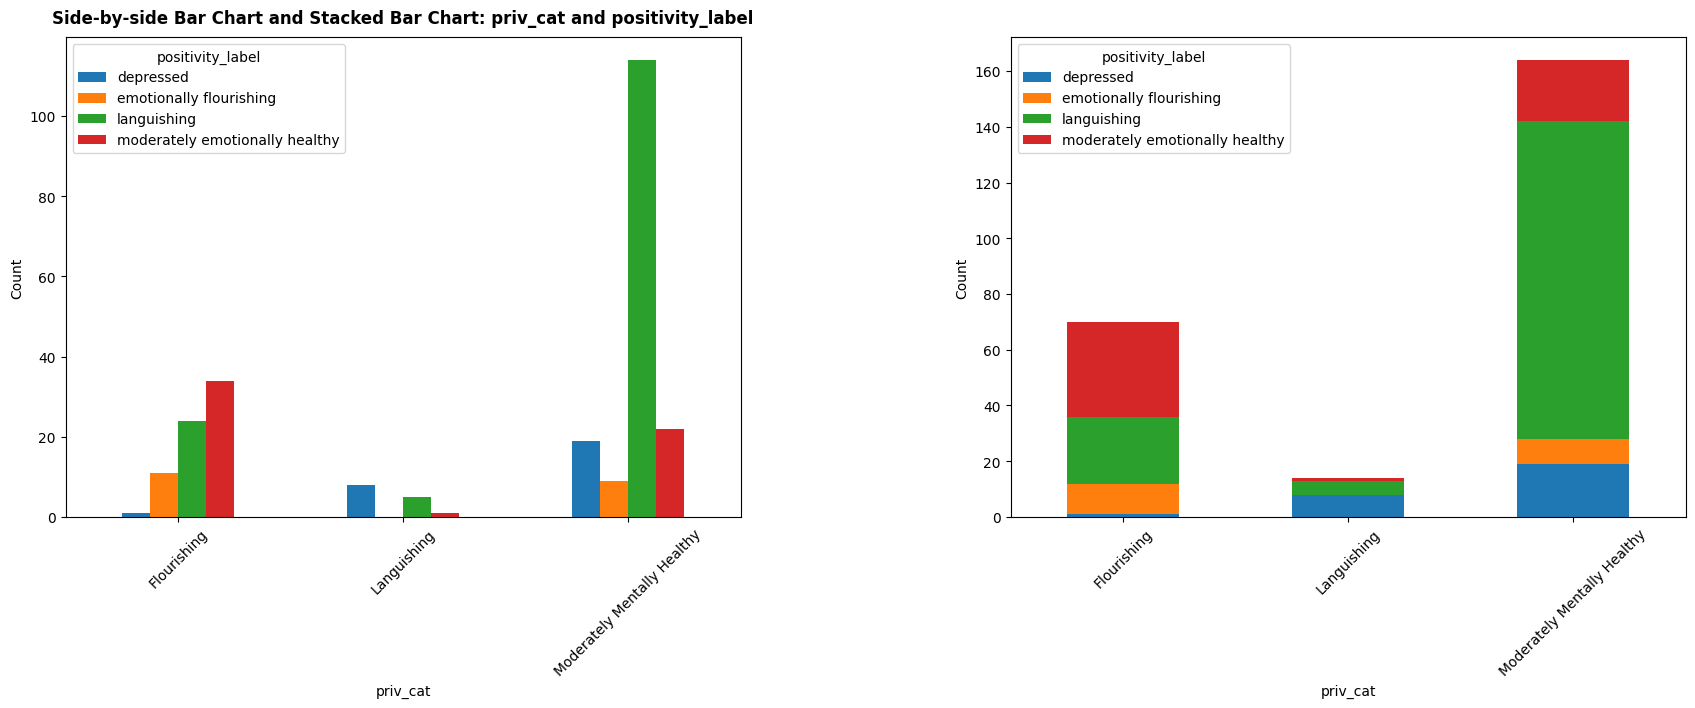

In [ ]:
significant_relationships = []
significance_level=0.05
for i in range(len(categorical_column)):
    for j in range(i + 1, len(categorical_column)):
        contingency_table, chi2, p, dof, expected,residuals,cramer_v = cont_chi_res(df, i, j)
        print(f"\033[1mContingency Table for {categorical_column[i]} and {categorical_column[j]}:\033[0m")
        print("-" * 80)
        print(contingency_table)
        print("\n")
        print(f"Expected frequencies:\n{expected}\n")
        print(f"Residuals:\n{residuals}\n")
        print(f"Chi-square statistic: {chi2}\n")
        print(f"P-value: {p}\n")
        print(f"Degrees of freedom: {dof}\n")
        print(f"Cramer's V: {cramer_v}\n")
        f, ax = plt.subplots(1, 2, figsize=(18, 6))
        ax = ax.flatten()

        # Plot the side-by-side bar chart
        contingency_table.plot(kind='bar', ax=ax[0], legend=True)
        ax[0].set_title(f'Side-by-side Bar Chart and Stacked Bar Chart: {categorical_column[i]} and {categorical_column[j]}', fontdict={'fontsize': 12, 'fontweight': 'bold'}, pad=10)
        ax[0].set_ylabel('Count')
        ax[0].legend(title=categorical_column[j])
        ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

        # Plot the stacked bar chart
        contingency_table.plot(kind='bar', stacked=True, ax=ax[1], legend=True)
        ax[1].set_ylabel('Count')
        ax[1].legend(title=categorical_column[j])
        ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
        plt.tight_layout()
        plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1, wspace=0.4)
        plt.show()
        if p < significance_level and cramer_v > 0.30:
                significant_relationships.append({
                    'Relationship': f'{categorical_column[i]}_x_{categorical_column[j]}',
                    'categorical1': categorical_column[i],
                    'categorical2': categorical_column[j],'chi-square': chi2,
                    'p-value': p,
                    'cramers_v': cramer_v
                })
significant_relationships_df = pd.DataFrame(significant_relationships)


In [ ]:
significant_relationships_df

,Relationship,categorical1,categorical2,chi-square,p-value,cramers_v
0,pro_cat_x_priv_cat,pro_cat,priv_cat,70.959618,1.423532e-14,0.309038
1,pro_cat_x_positivity_label,pro_cat,positivity_label,93.426757,5.875955e-18,0.354602
2,priv_cat_x_positivity_label,priv_cat,positivity_label,79.471735,4.593223e-15,0.327048


#### correlation and scatter plot

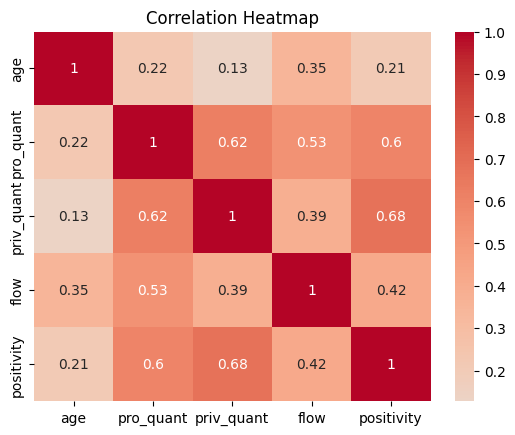

In [ ]:
df_corr = df[numerical_column].corr(method = 'spearman' )
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Assuming df is your DataFrame and 'positivity' is the column of interest
correlation_threshold = 0.4  # Define your threshold for high correlation

# Calculate the correlation with the 'positivity' column
correlations = df[numerical_column].corr()['positivity']

# Filter out the variables that have a high correlation with 'positivity'
highly_correlated_variables = [var for var in correlations.index if abs(correlations[var]) > correlation_threshold and var != 'positivity']

print(highly_correlated_variables)

['pro_quant', 'priv_quant', 'flow']


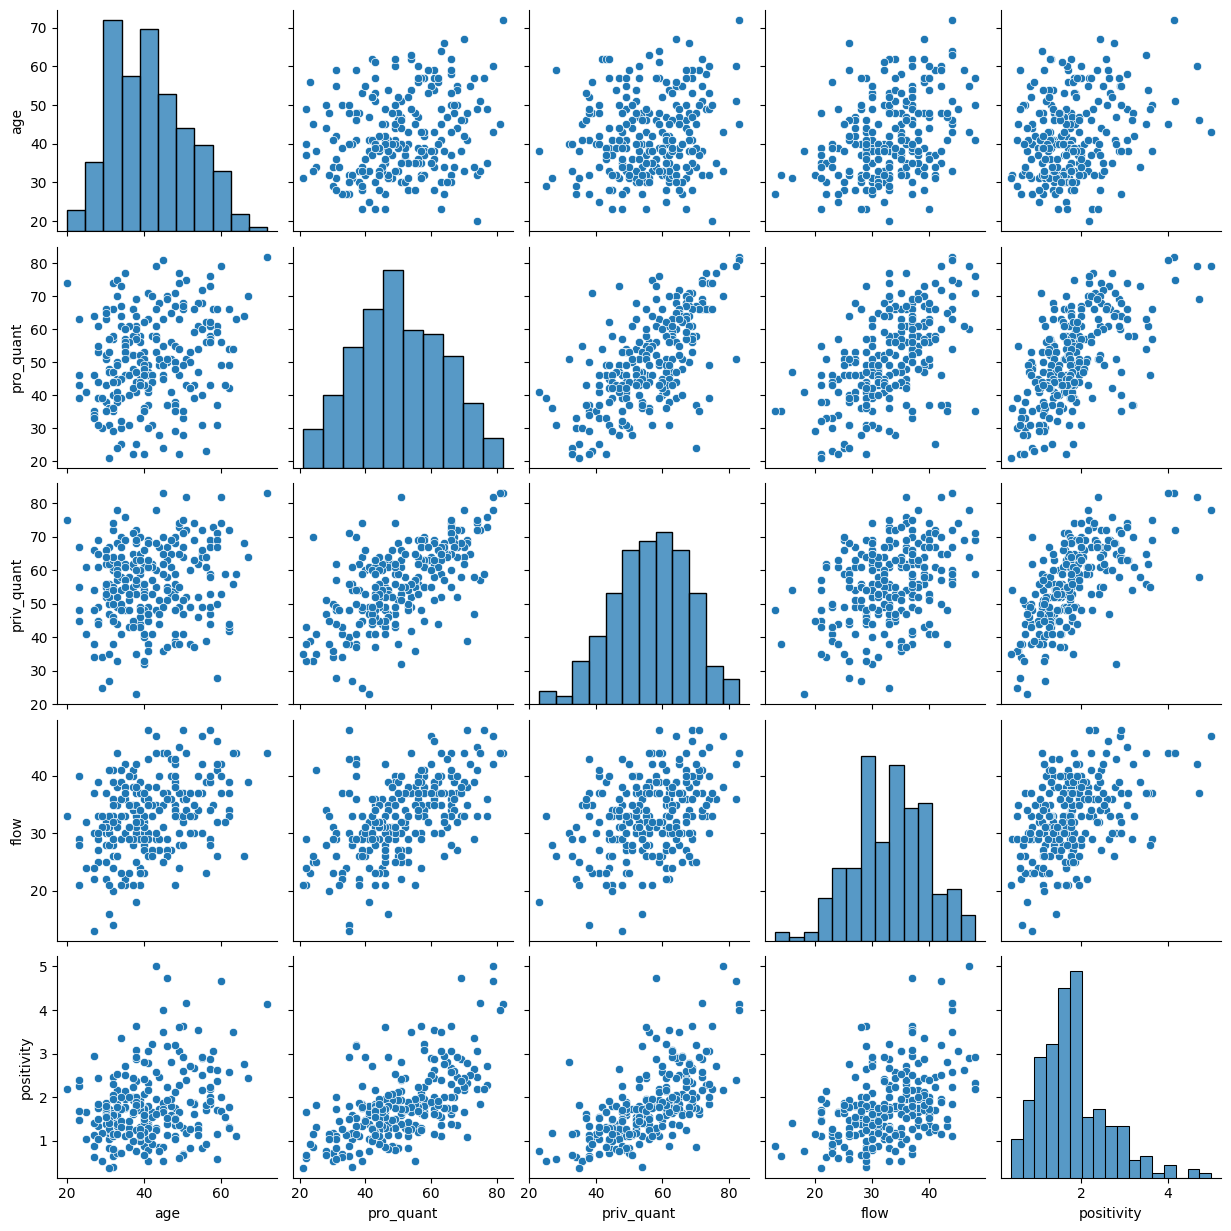

In [ ]:
sns.pairplot(df[numerical_column]);

#### Exponential Transform (based on scatter plot)

In [ ]:
exponential_predictors = ['pro_quant', 'priv_quant', 'flow']

# Perform the exponential conversion
for col in exponential_predictors:
    df[col + '_exp_log'] = np.log(np.exp(df[col]))

In [ ]:
exponential_predictors_transform= ['pro_quant_exp_log', 'priv_quant_exp_log', 'flow_exp_log']

In [ ]:
df.head()

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,positivity_label,postivity_log,pro_quant_exp_log,priv_quant_exp_log,flow_exp_log
0,72,5 years or more after high school,Female,Separated/Divorced,Flourishing,82,Flourishing,83,4.142857,44,emotionally flourishing,1.637609,82.0,83.0,44.0
1,45,5 years or more after high school,Female,Separated/Divorced,Flourishing,81,Flourishing,83,4.000000,44,emotionally flourishing,1.609438,81.0,83.0,44.0
2,43,Up to 4 years after high school,Male,Single,Flourishing,79,Flourishing,78,5.000000,47,emotionally flourishing,1.791759,79.0,78.0,47.0
3,60,Completed high school degree,Female,Couple,Flourishing,79,Flourishing,82,4.666667,42,emotionally flourishing,1.734601,79.0,82.0,42.0
4,49,Completed high school degree,Female,Separated/Divorced,Flourishing,77,Flourishing,73,2.285714,33,moderately emotionally healthy,1.189584,77.0,73.0,33.0


#### Scatter Regression

In [ ]:
def scatter_regression(df):


    fig, axes = plt.subplots(2,2, figsize=(14, 8))
    axes = axes.flatten()

    for idx, i in enumerate(numerical_predictors_df):
        sns.regplot(x=i, y=target.name, data=df, ax=axes[idx], line_kws={'color': 'red', 'linewidth': 1}, scatter_kws={'s': 10, 'alpha': 0.7})

        # Set labels and title for each subplot
        axes[idx].set_xlabel(i)
        axes[idx].set_ylabel(target.name)
        axes[idx].set_title(f'Scatter Plot of {i} vs {target.name}')

    # Adjust layout to prevent overlap

    plt.tight_layout()
    plt.show()

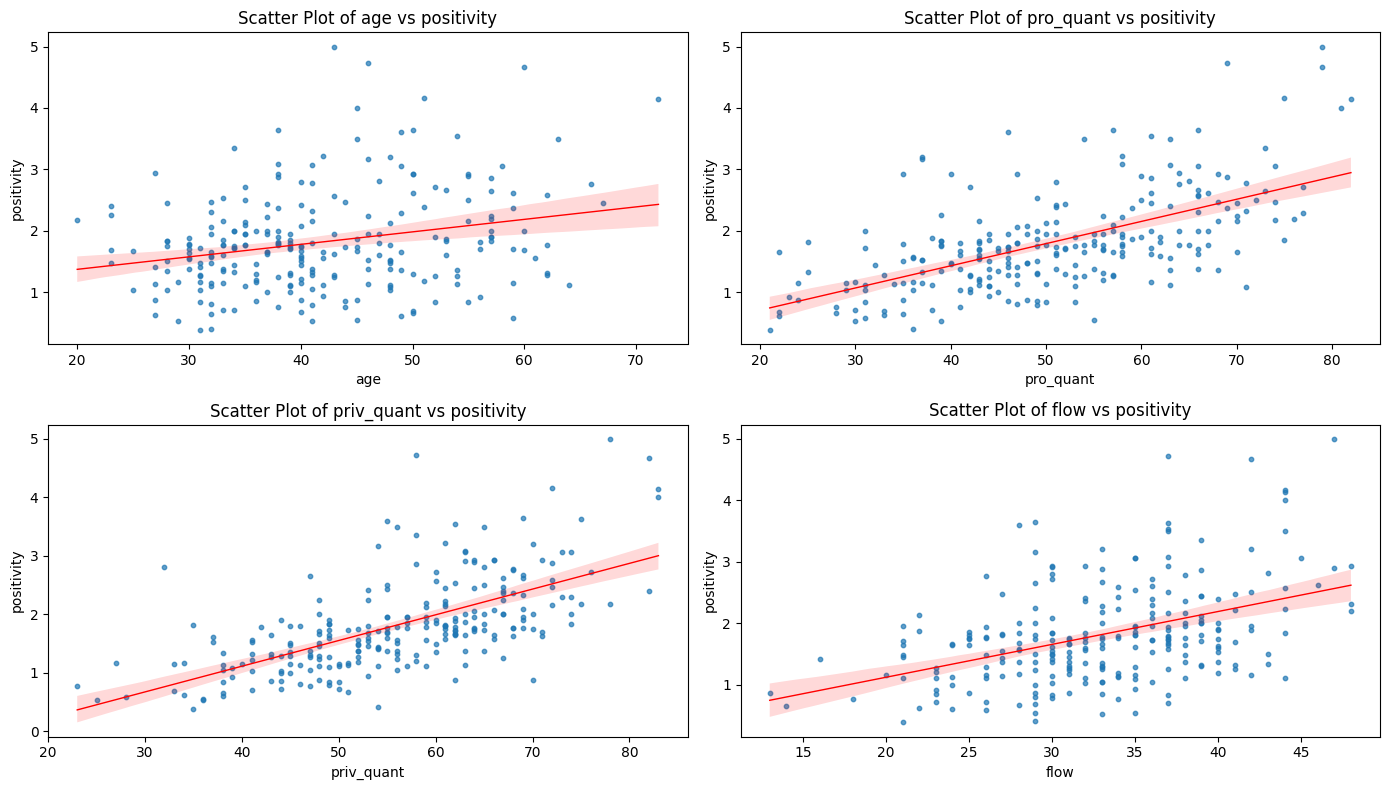

In [ ]:
scatter_regression(df)

### Anova and significant variables for interaction

In [ ]:
numerical_predictors = numerical_predictors_df.columns
categorical_predictors = categorical_predictors_df.columns

In [ ]:
def anova_and_boxplots(df, num_var, cat_var):

    formula = f'{num_var} ~ C({cat_var})'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cat_var, y=num_var, data=df)
    plt.title(f'Boxplot of {num_var} by {cat_var}')
    plt.xticks(rotation=90)
    plt.show()
    return anova_table

ANOVA for age by education


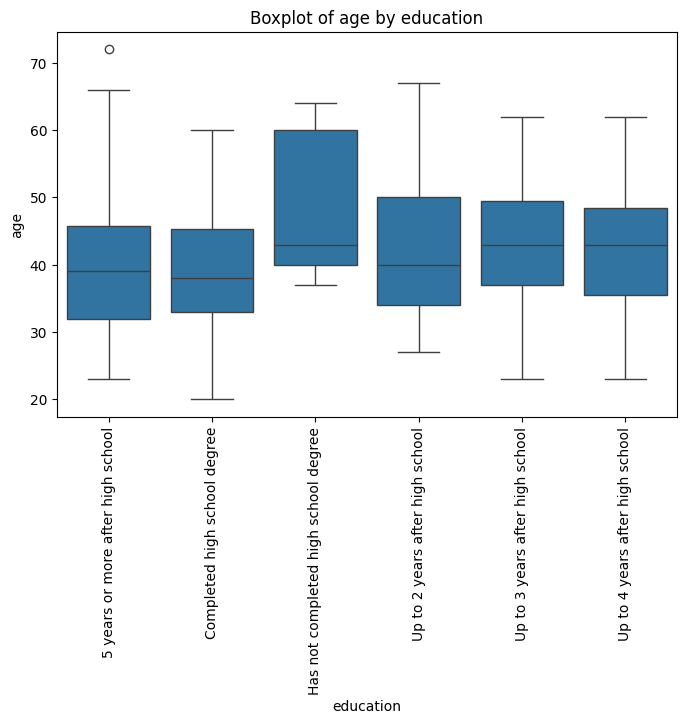

                    sum_sq     df         F    PR(>F)
C(education)    962.071856    5.0  1.900009  0.094983
Residual      24507.395886  242.0       NaN       NaN


ANOVA for age by sex


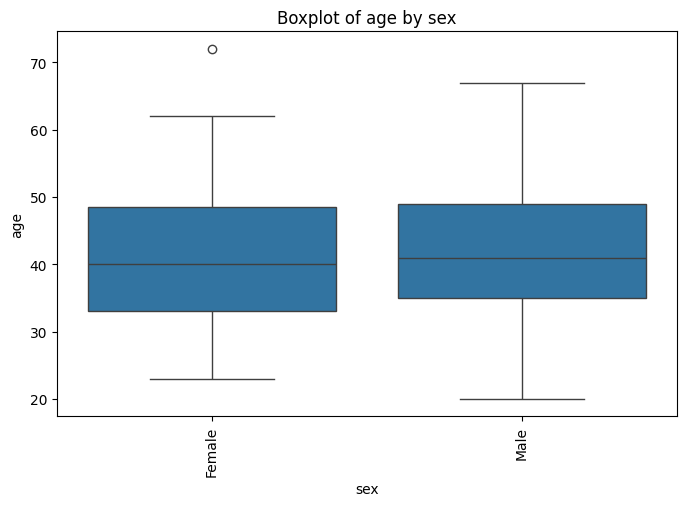

                sum_sq     df         F    PR(>F)
C(sex)       41.500650    1.0  0.401493  0.526908
Residual  25427.967092  246.0       NaN       NaN


ANOVA for age by famstatus


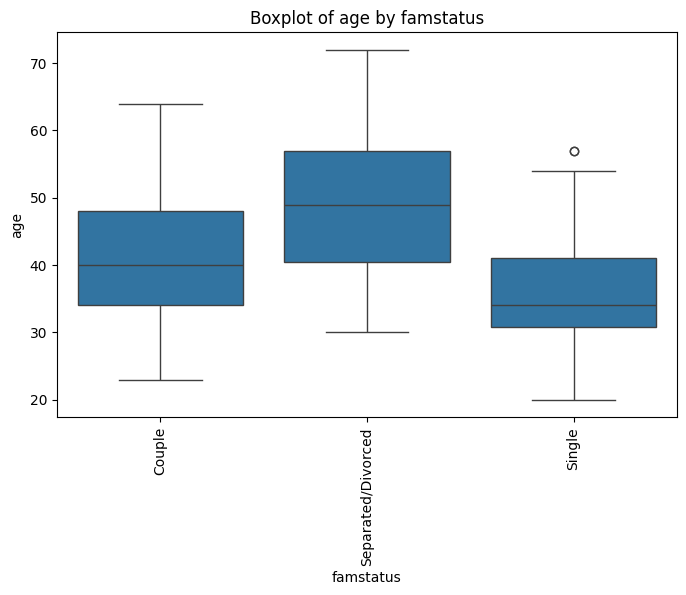

                    sum_sq     df          F        PR(>F)
C(famstatus)   2936.339336    2.0  15.963233  3.042277e-07
Residual      22533.128406  245.0        NaN           NaN


ANOVA for age by pro_cat


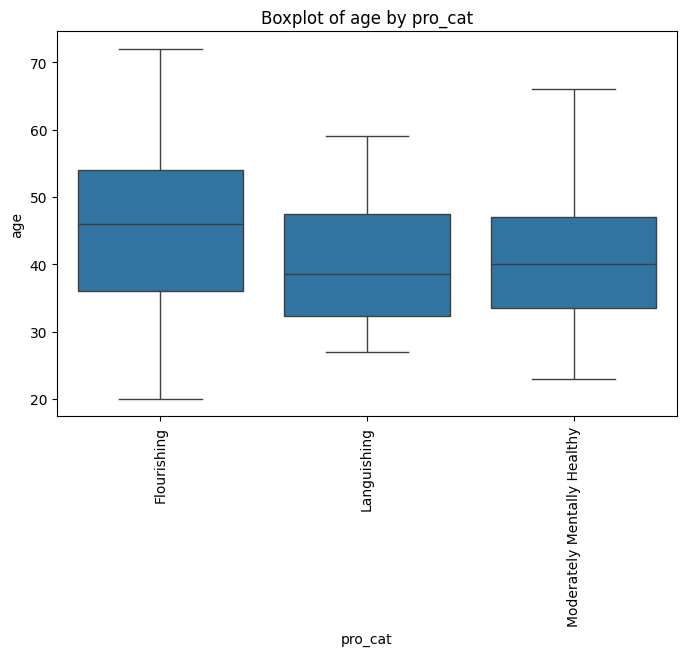

                  sum_sq     df         F    PR(>F)
C(pro_cat)    970.759883    2.0  4.854055  0.008563
Residual    24498.707859  245.0       NaN       NaN


ANOVA for age by priv_cat


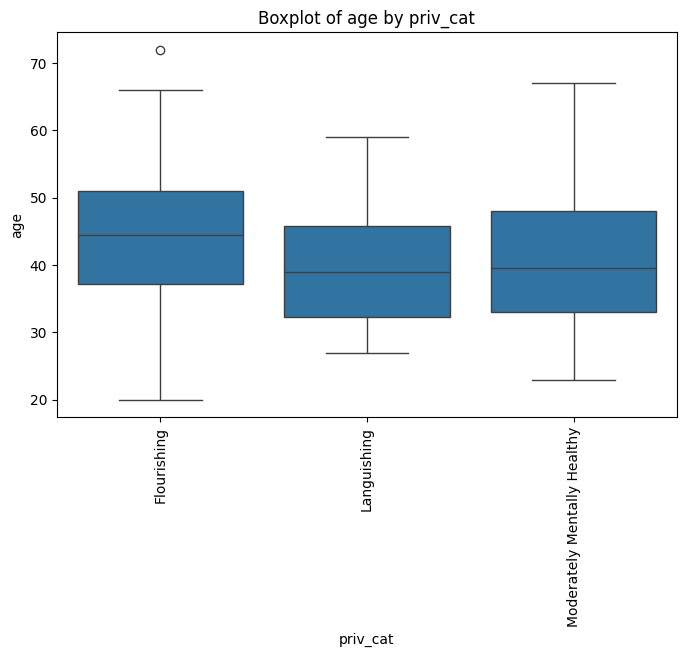

                   sum_sq     df         F   PR(>F)
C(priv_cat)    682.309554    2.0  3.372025  0.03592
Residual     24787.158188  245.0       NaN      NaN


ANOVA for pro_quant by education


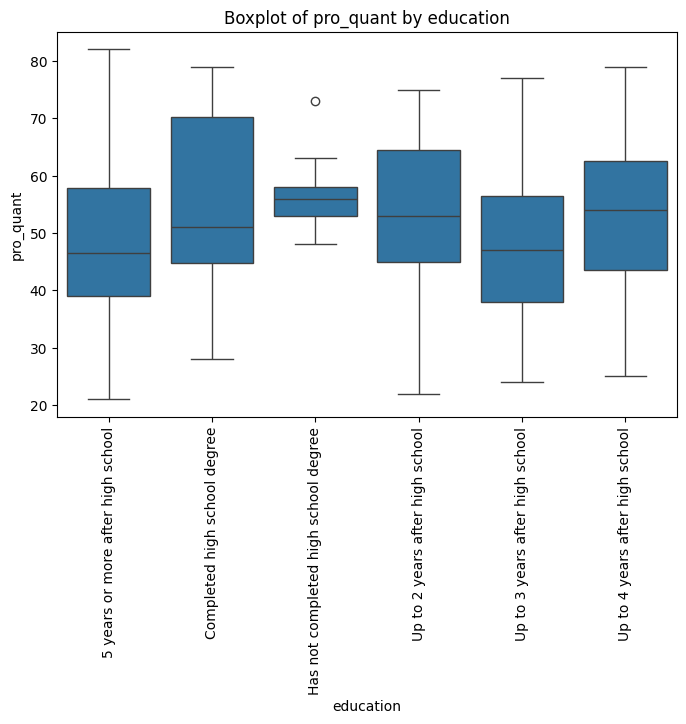

                    sum_sq     df         F    PR(>F)
C(education)   2164.319879    5.0  2.470794  0.033138
Residual      42396.518831  242.0       NaN       NaN


ANOVA for pro_quant by sex


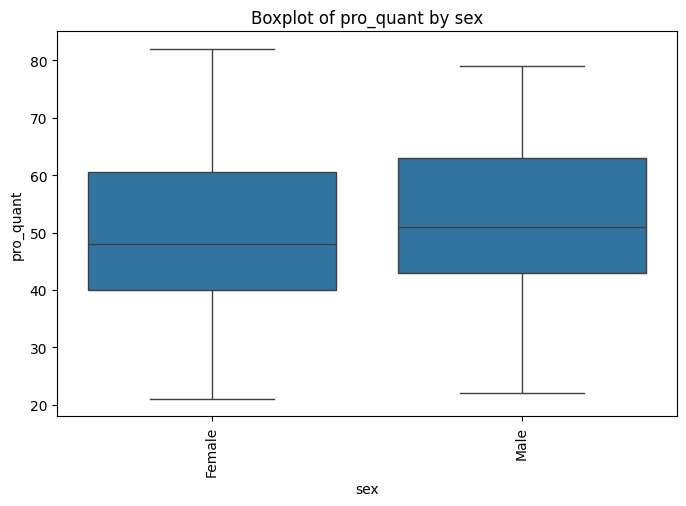

                sum_sq     df         F    PR(>F)
C(sex)      154.578725    1.0  0.856329  0.355675
Residual  44406.259985  246.0       NaN       NaN


ANOVA for pro_quant by famstatus


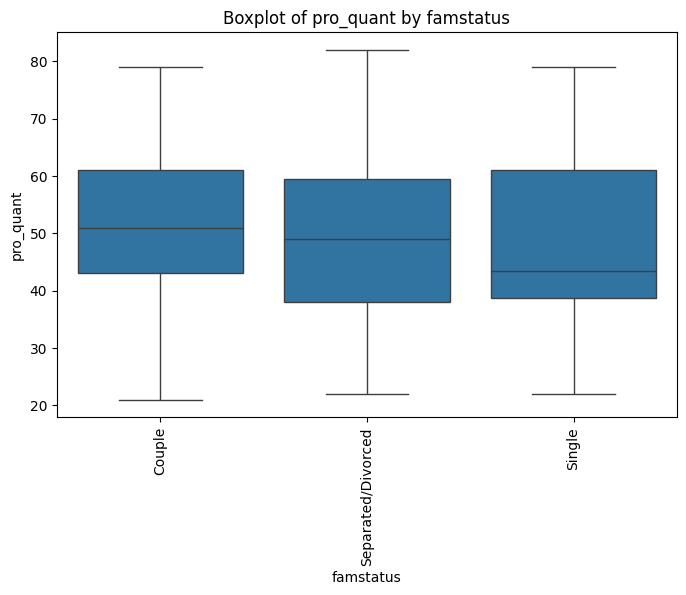

                    sum_sq     df         F   PR(>F)
C(famstatus)    106.290402    2.0  0.292896  0.74636
Residual      44454.548307  245.0       NaN      NaN


ANOVA for pro_quant by pro_cat


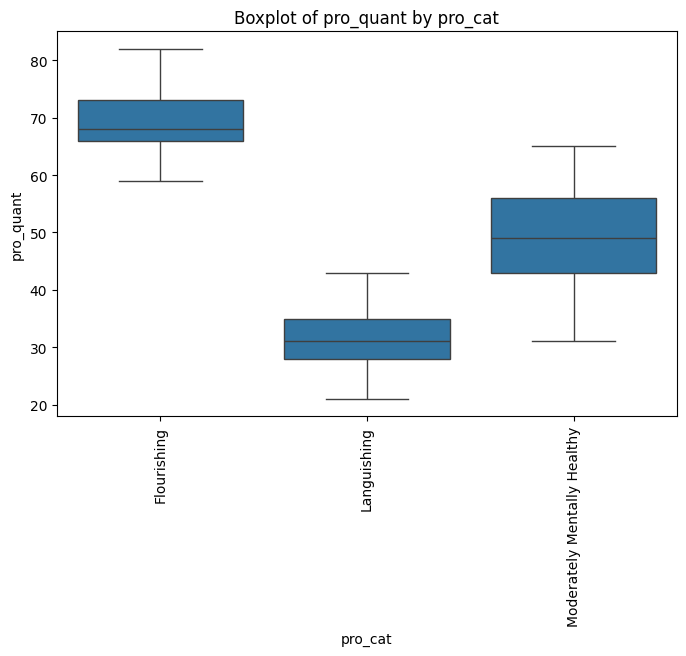

                  sum_sq     df           F        PR(>F)
C(pro_cat)  32347.917784    2.0  324.461278  1.375967e-69
Residual    12212.920926  245.0         NaN           NaN


ANOVA for pro_quant by priv_cat


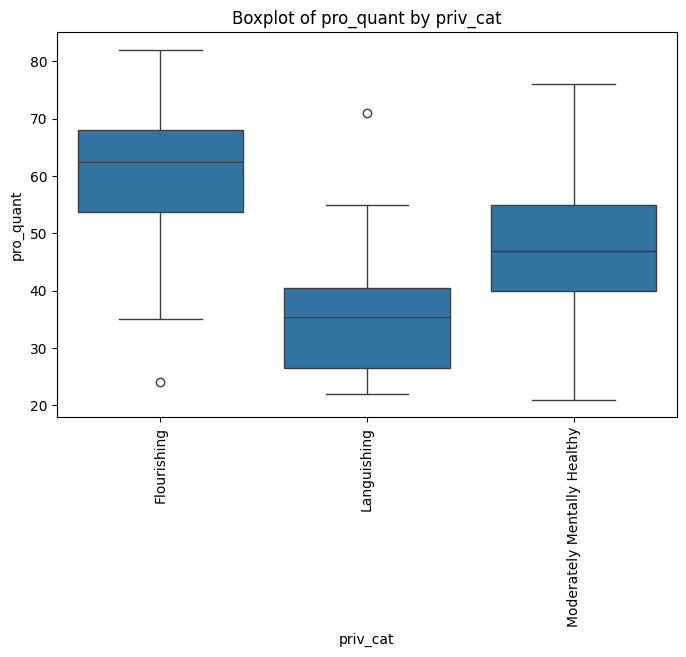

                  sum_sq     df          F        PR(>F)
C(priv_cat)  11017.83871    2.0  40.237464  7.752591e-16
Residual     33543.00000  245.0        NaN           NaN


ANOVA for priv_quant by education


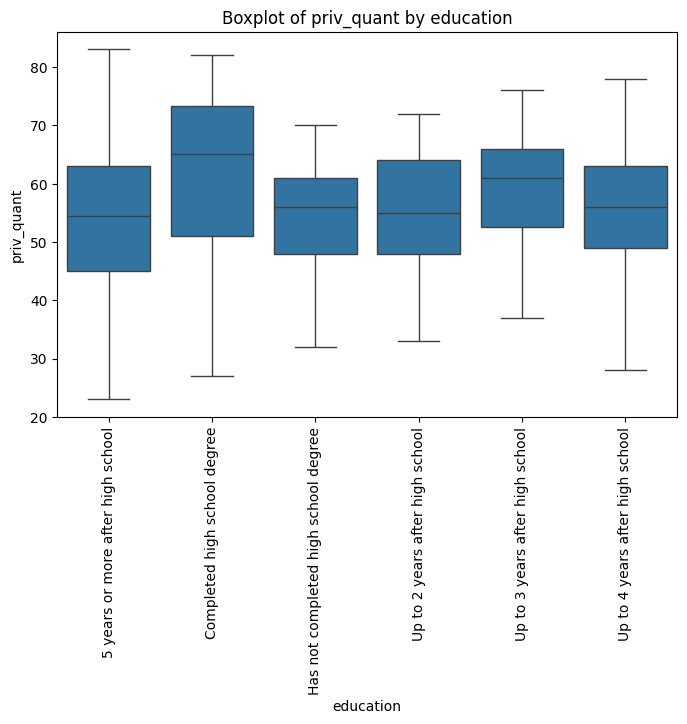

                    sum_sq     df         F    PR(>F)
C(education)    935.171854    5.0  1.397943  0.225657
Residual      32377.791855  242.0       NaN       NaN


ANOVA for priv_quant by sex


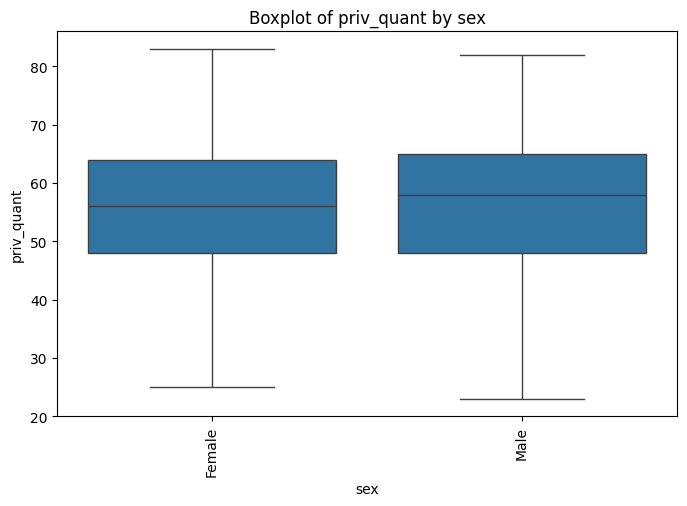

                sum_sq     df         F    PR(>F)
C(sex)        2.113843    1.0  0.015611  0.900671
Residual  33310.849867  246.0       NaN       NaN


ANOVA for priv_quant by famstatus


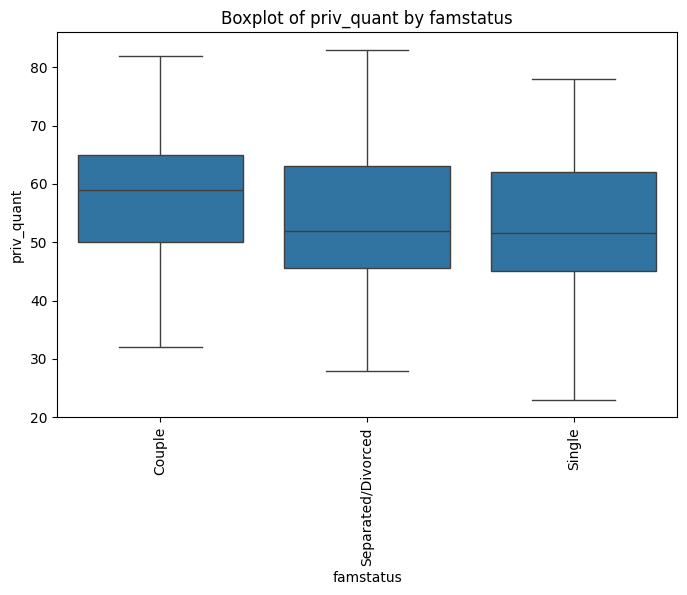

                    sum_sq     df         F    PR(>F)
C(famstatus)   1020.983198    2.0  3.873112  0.022079
Residual      32291.980512  245.0       NaN       NaN


ANOVA for priv_quant by pro_cat


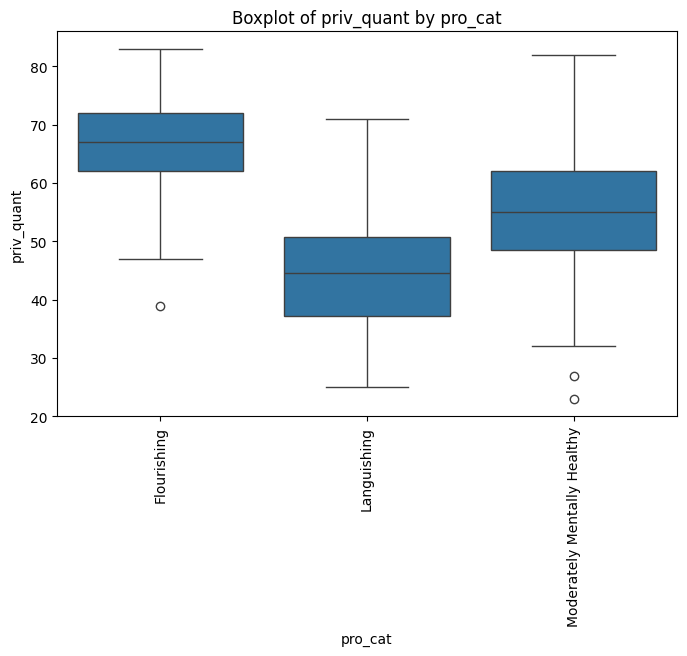

                  sum_sq     df          F        PR(>F)
C(pro_cat)  10338.241082    2.0  55.122952  1.710146e-20
Residual    22974.722628  245.0        NaN           NaN


ANOVA for priv_quant by priv_cat


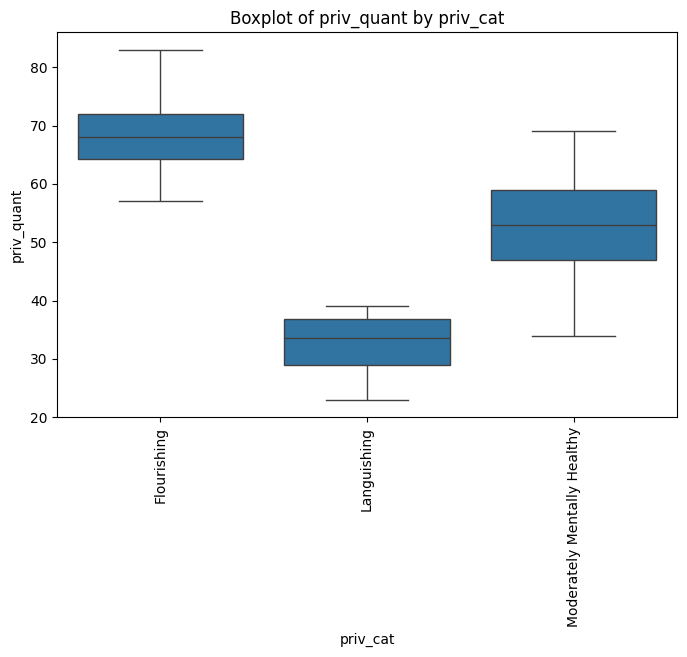

                   sum_sq     df           F        PR(>F)
C(priv_cat)  20834.796811    2.0  204.538265  5.732526e-53
Residual     12478.166899  245.0         NaN           NaN


ANOVA for flow by education


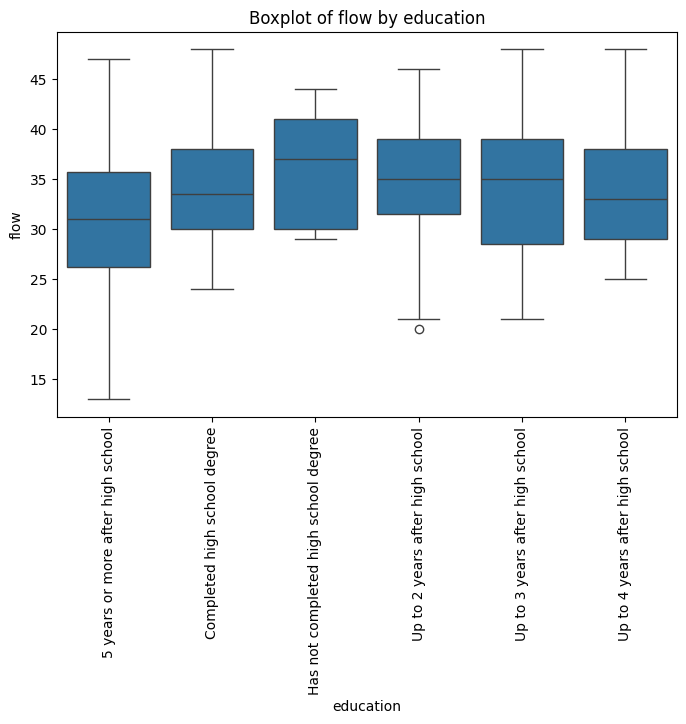

                   sum_sq     df         F    PR(>F)
C(education)   773.331928    5.0  3.748892  0.002747
Residual      9984.087426  242.0       NaN       NaN


ANOVA for flow by sex


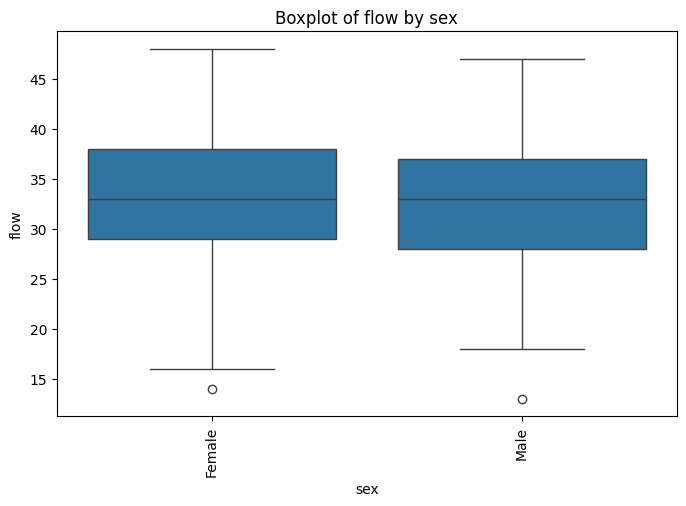

                sum_sq     df         F   PR(>F)
C(sex)       21.106253    1.0  0.483605  0.48745
Residual  10736.313102  246.0       NaN      NaN


ANOVA for flow by famstatus


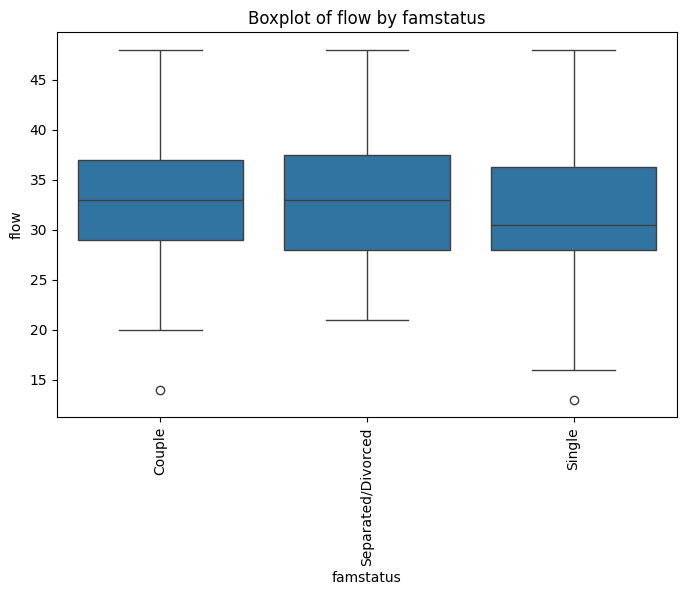

                    sum_sq     df        F    PR(>F)
C(famstatus)    146.327365    2.0  1.68928  0.186796
Residual      10611.091990  245.0      NaN       NaN


ANOVA for flow by pro_cat


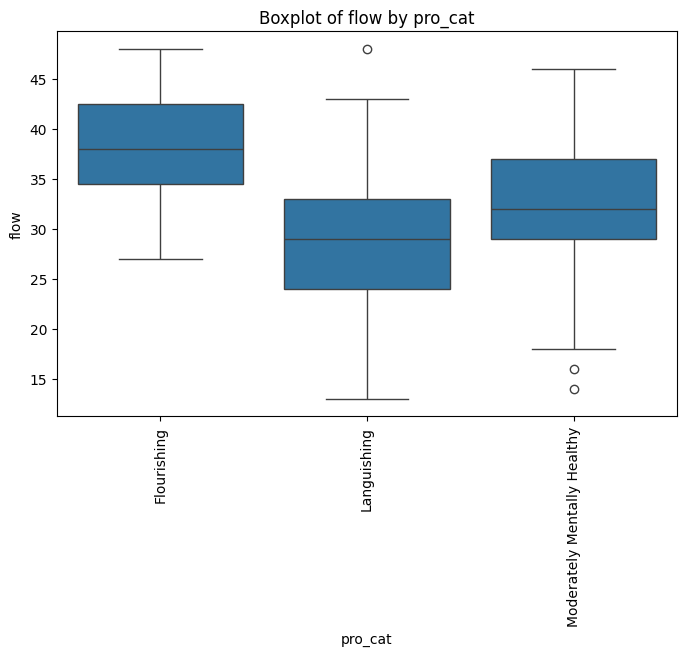

                 sum_sq     df          F        PR(>F)
C(pro_cat)  2004.297336    2.0  28.050154  1.073305e-11
Residual    8753.122018  245.0        NaN           NaN


ANOVA for flow by priv_cat


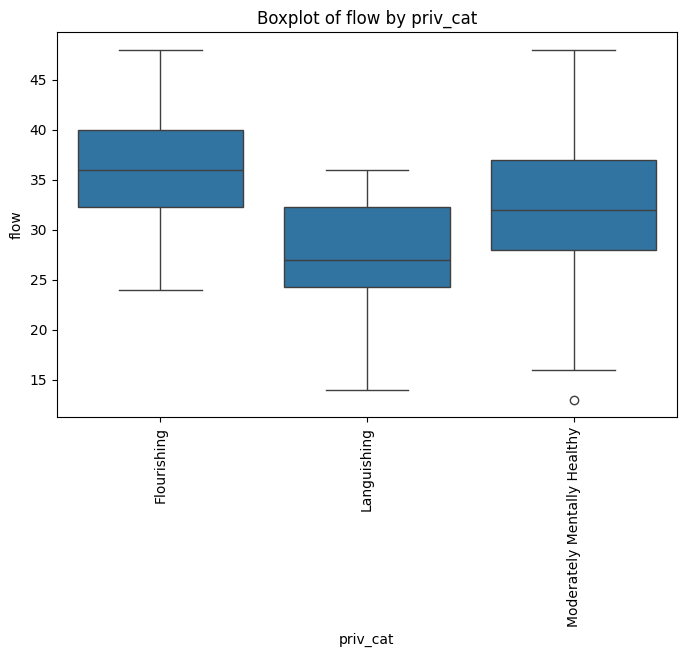

                  sum_sq     df          F        PR(>F)
C(priv_cat)  1298.521271    2.0  16.816848  1.432929e-07
Residual     9458.898084  245.0        NaN           NaN




In [ ]:
significance_level=0.05
significant_interactions = []
significant_interactions_pvalue = []
for i in numerical_predictors:
    for j in categorical_predictors:
        print(f'ANOVA for {i} by {j}')
        anova_table = anova_and_boxplots(df, i, j)
        print(anova_table)
        print("\n")
        p_value = anova_table['PR(>F)'].iloc[0]
        if p_value < significance_level:
                significant_interactions.append({'Interaction(numxcate)': (f'{i}_x_{j}'),'numerical':i,'categorical':j,'p-value':p_value})
significant_interactions_df = pd.DataFrame(significant_interactions)


In [ ]:
print("Anova Results\n",significant_interactions_df)

Anova Results
      Interaction(numxcate)   numerical categorical       p-value
0          age_x_famstatus         age   famstatus  3.042277e-07
1            age_x_pro_cat         age     pro_cat  8.562596e-03
2           age_x_priv_cat         age    priv_cat  3.592043e-02
3    pro_quant_x_education   pro_quant   education  3.313847e-02
4      pro_quant_x_pro_cat   pro_quant     pro_cat  1.375967e-69
5     pro_quant_x_priv_cat   pro_quant    priv_cat  7.752591e-16
6   priv_quant_x_famstatus  priv_quant   famstatus  2.207866e-02
7     priv_quant_x_pro_cat  priv_quant     pro_cat  1.710146e-20
8    priv_quant_x_priv_cat  priv_quant    priv_cat  5.732526e-53
9         flow_x_education        flow   education  2.746688e-03
10          flow_x_pro_cat        flow     pro_cat  1.073305e-11
11         flow_x_priv_cat        flow    priv_cat  1.432929e-07


In [ ]:
significant_interaction_column=list(significant_interactions_df['Interaction(numxcate)'])

In [ ]:
significant_interaction_column

['age_x_famstatus',
 'age_x_pro_cat',
 'age_x_priv_cat',
 'pro_quant_x_education',
 'pro_quant_x_pro_cat',
 'pro_quant_x_priv_cat',
 'priv_quant_x_famstatus',
 'priv_quant_x_pro_cat',
 'priv_quant_x_priv_cat',
 'flow_x_education',
 'flow_x_pro_cat',
 'flow_x_priv_cat']

### Encoding Categorical Variables

In [ ]:


def one_hot_encoding(df, columns):
    
    # One-hot encode binary columns with drop_first=True
    for col in columns:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
        df.drop(columns=col, inplace=True)
    return df


In [ ]:
df_encoded_category = one_hot_encoding(categorical_predictors_df, categorical_predictors)

In [ ]:
df_encoded_category.head()

,sex_Male,education_5 years or more after high school,education_Completed high school degree,education_Has not completed high school degree,education_Up to 2 years after high school,education_Up to 3 years after high school,education_Up to 4 years after high school,famstatus_Couple,famstatus_Separated/Divorced,famstatus_Single,pro_cat_Flourishing,pro_cat_Languishing,pro_cat_Moderately Mentally Healthy,priv_cat_Flourishing,priv_cat_Languishing,priv_cat_Moderately Mentally Healthy
0,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False
2,True,False,False,False,False,False,True,False,False,True,True,False,False,True,False,False
3,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
4,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False


In [ ]:
df_encoded_category=df_encoded_category.astype(int)

In [ ]:
all_predictors_with_encoding=pd.concat([numerical_predictors_df[highly_correlated_variables],df_encoded_category],axis=1)

In [ ]:
target_log = df['postivity_log']  # Target variable

In [ ]:
all_predictors_with_encoding.head()

,pro_quant,priv_quant,flow,sex_Male,education_5 years or more after high school,education_Completed high school degree,education_Has not completed high school degree,education_Up to 2 years after high school,education_Up to 3 years after high school,education_Up to 4 years after high school,famstatus_Couple,famstatus_Separated/Divorced,famstatus_Single,pro_cat_Flourishing,pro_cat_Languishing,pro_cat_Moderately Mentally Healthy,priv_cat_Flourishing,priv_cat_Languishing,priv_cat_Moderately Mentally Healthy
0,82,83,44,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1,81,83,44,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,79,78,47,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,79,82,42,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,77,73,33,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0


### Significant Interaction Predictors

In [ ]:
print(categorical_predictors)
print(numerical_predictors)

print(significant_interactions_df)
print("\n")
significant_interaction_column

Index(['education', 'sex', 'famstatus', 'pro_cat', 'priv_cat'], dtype='object')
Index(['age', 'pro_quant', 'priv_quant', 'flow'], dtype='object')
     Interaction(numxcate)   numerical categorical       p-value
0          age_x_famstatus         age   famstatus  3.042277e-07
1            age_x_pro_cat         age     pro_cat  8.562596e-03
2           age_x_priv_cat         age    priv_cat  3.592043e-02
3    pro_quant_x_education   pro_quant   education  3.313847e-02
4      pro_quant_x_pro_cat   pro_quant     pro_cat  1.375967e-69
5     pro_quant_x_priv_cat   pro_quant    priv_cat  7.752591e-16
6   priv_quant_x_famstatus  priv_quant   famstatus  2.207866e-02
7     priv_quant_x_pro_cat  priv_quant     pro_cat  1.710146e-20
8    priv_quant_x_priv_cat  priv_quant    priv_cat  5.732526e-53
9         flow_x_education        flow   education  2.746688e-03
10          flow_x_pro_cat        flow     pro_cat  1.073305e-11
11         flow_x_priv_cat        flow    priv_cat  1.432929e-07




['age_x_famstatus',
 'age_x_pro_cat',
 'age_x_priv_cat',
 'pro_quant_x_education',
 'pro_quant_x_pro_cat',
 'pro_quant_x_priv_cat',
 'priv_quant_x_famstatus',
 'priv_quant_x_pro_cat',
 'priv_quant_x_priv_cat',
 'flow_x_education',
 'flow_x_pro_cat',
 'flow_x_priv_cat']

In [ ]:
print(significant_relationships_df)
print("\n")
list(significant_relationships_df["Relationship"])

                  Relationship categorical1      categorical2  chi-square       p-value  cramers_v
0           pro_cat_x_priv_cat      pro_cat          priv_cat   70.959618  1.423532e-14   0.309038
1   pro_cat_x_positivity_label      pro_cat  positivity_label   93.426757  5.875955e-18   0.354602
2  priv_cat_x_positivity_label     priv_cat  positivity_label   79.471735  4.593223e-15   0.327048




['pro_cat_x_priv_cat',
 'pro_cat_x_positivity_label',
 'priv_cat_x_positivity_label']

In [ ]:
def add_interaction_terms(df):
    """Add interaction terms (pairwise) between all columns in df."""
    interaction_df = pd.DataFrame(index=df.index)
    for col1, col2 in combinations(all_predictors_with_encoding, 2):
        interaction_df[f'{col1}_x_{col2}'] = df[col1] * df[col2]
    return interaction_df

In [ ]:
interaction_df = add_interaction_terms(all_predictors_with_encoding)
print (interaction_df.columns)
print(len(interaction_df.columns))

Index(['pro_quant_x_priv_quant', 'pro_quant_x_flow', 'pro_quant_x_sex_Male', 'pro_quant_x_education_5 years or more after high school', 'pro_quant_x_education_Completed high school degree', 'pro_quant_x_education_Has not completed high school degree', 'pro_quant_x_education_Up to 2 years after high school', 'pro_quant_x_education_Up to 3 years after high school', 'pro_quant_x_education_Up to 4 years after high school', 'pro_quant_x_famstatus_Couple',
       ...
       'pro_cat_Languishing_x_pro_cat_Moderately Mentally Healthy', 'pro_cat_Languishing_x_priv_cat_Flourishing', 'pro_cat_Languishing_x_priv_cat_Languishing', 'pro_cat_Languishing_x_priv_cat_Moderately Mentally Healthy', 'pro_cat_Moderately Mentally Healthy_x_priv_cat_Flourishing', 'pro_cat_Moderately Mentally Healthy_x_priv_cat_Languishing', 'pro_cat_Moderately Mentally Healthy_x_priv_cat_Moderately Mentally Healthy', 'priv_cat_Flourishing_x_priv_cat_Languishing', 'priv_cat_Flourishing_x_priv_cat_Moderately Mentally Healthy', 

In [ ]:
def find_matching_columns(df_encoded):
    matching_columns = []

    for index, row in significant_relationships_df.iterrows():
        category1 = row['categorical1']
        category2 = row['categorical2']
        for col in df_encoded.columns:
          if category1 in col and category2 in col:
                  matching_columns.append(col)
    for index, row in significant_interactions_df.iterrows():
        numerical = row['numerical']
        categorical = row['categorical']


        for col in df_encoded.columns:
            if numerical in col and categorical in col:
                matching_columns.append(col)

    return matching_columns

In [ ]:
find_matching_columns(interaction_df)

['pro_cat_Flourishing_x_priv_cat_Flourishing',
 'pro_cat_Flourishing_x_priv_cat_Languishing',
 'pro_cat_Flourishing_x_priv_cat_Moderately Mentally Healthy',
 'pro_cat_Languishing_x_priv_cat_Flourishing',
 'pro_cat_Languishing_x_priv_cat_Languishing',
 'pro_cat_Languishing_x_priv_cat_Moderately Mentally Healthy',
 'pro_cat_Moderately Mentally Healthy_x_priv_cat_Flourishing',
 'pro_cat_Moderately Mentally Healthy_x_priv_cat_Languishing',
 'pro_cat_Moderately Mentally Healthy_x_priv_cat_Moderately Mentally Healthy',
 'pro_quant_x_education_5 years or more after high school',
 'pro_quant_x_education_Completed high school degree',
 'pro_quant_x_education_Has not completed high school degree',
 'pro_quant_x_education_Up to 2 years after high school',
 'pro_quant_x_education_Up to 3 years after high school',
 'pro_quant_x_education_Up to 4 years after high school',
 'pro_quant_x_pro_cat_Flourishing',
 'pro_quant_x_pro_cat_Languishing',
 'pro_quant_x_pro_cat_Moderately Mentally Healthy',
 'pro

In [ ]:
interaction_df_with_significant_interactions=interaction_df[find_matching_columns(interaction_df)]
interaction_df_with_significant_interactions=interaction_df_with_significant_interactions.astype(int)

In [ ]:
interaction_df_with_significant_interactions.head()

,pro_cat_Flourishing_x_priv_cat_Flourishing,pro_cat_Flourishing_x_priv_cat_Languishing,pro_cat_Flourishing_x_priv_cat_Moderately Mentally Healthy,pro_cat_Languishing_x_priv_cat_Flourishing,pro_cat_Languishing_x_priv_cat_Languishing,pro_cat_Languishing_x_priv_cat_Moderately Mentally Healthy,pro_cat_Moderately Mentally Healthy_x_priv_cat_Flourishing,pro_cat_Moderately Mentally Healthy_x_priv_cat_Languishing,pro_cat_Moderately Mentally Healthy_x_priv_cat_Moderately Mentally Healthy,pro_quant_x_education_5 years or more after high school,pro_quant_x_education_Completed high school degree,pro_quant_x_education_Has not completed high school degree,pro_quant_x_education_Up to 2 years after high school,pro_quant_x_education_Up to 3 years after high school,pro_quant_x_education_Up to 4 years after high school,pro_quant_x_pro_cat_Flourishing,pro_quant_x_pro_cat_Languishing,pro_quant_x_pro_cat_Moderately Mentally Healthy,pro_quant_x_priv_cat_Flourishing,pro_quant_x_priv_cat_Languishing,pro_quant_x_priv_cat_Moderately Mentally Healthy,priv_quant_x_famstatus_Couple,priv_quant_x_famstatus_Separated/Divorced,priv_quant_x_famstatus_Single,priv_quant_x_pro_cat_Flourishing,priv_quant_x_pro_cat_Languishing,priv_quant_x_pro_cat_Moderately Mentally Healthy,priv_quant_x_priv_cat_Flourishing,priv_quant_x_priv_cat_Languishing,priv_quant_x_priv_cat_Moderately Mentally Healthy,flow_x_education_5 years or more after high school,flow_x_education_Completed high school degree,flow_x_education_Has not completed high school degree,flow_x_education_Up to 2 years after high school,flow_x_education_Up to 3 years after high school,flow_x_education_Up to 4 years after high school,flow_x_pro_cat_Flourishing,flow_x_pro_cat_Languishing,flow_x_pro_cat_Moderately Mentally Healthy,flow_x_priv_cat_Flourishing,flow_x_priv_cat_Languishing,flow_x_priv_cat_Moderately Mentally Healthy
0,1,0,0,0,0,0,0,0,0,82,0,0,0,0,0,82,0,0,82,0,0,0,83,0,83,0,0,83,0,0,44,0,0,0,0,0,44,0,0,44,0,0
1,1,0,0,0,0,0,0,0,0,81,0,0,0,0,0,81,0,0,81,0,0,0,83,0,83,0,0,83,0,0,44,0,0,0,0,0,44,0,0,44,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,79,79,0,0,79,0,0,0,0,78,78,0,0,78,0,0,0,0,0,0,0,47,47,0,0,47,0,0
3,1,0,0,0,0,0,0,0,0,0,79,0,0,0,0,79,0,0,79,0,0,82,0,0,82,0,0,82,0,0,0,42,0,0,0,0,42,0,0,42,0,0
4,1,0,0,0,0,0,0,0,0,0,77,0,0,0,0,77,0,0,77,0,0,0,73,0,73,0,0,73,0,0,0,33,0,0,0,0,33,0,0,33,0,0


In [ ]:
len(interaction_df_with_significant_interactions.columns)

42

In [ ]:
final_encoded_df_with_interaction = pd.concat([all_predictors_with_encoding, interaction_df_with_significant_interactions], axis=1)

In [ ]:
len(final_encoded_df_with_interaction.columns)

61